# <font color='blue'>Part 1 - Data Preprocessing</font>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw
%matplotlib inline

## Importing the dataset

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

                                             |          | [  0%]   00:00 -> (? left)


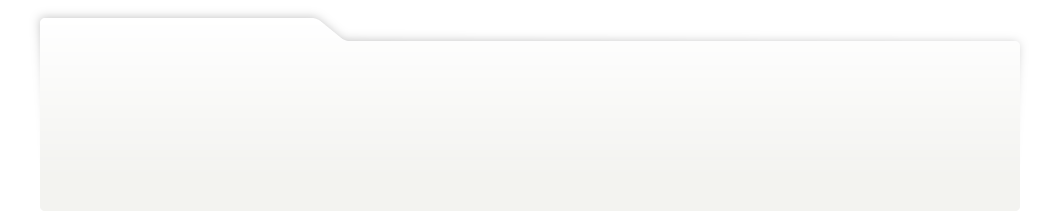
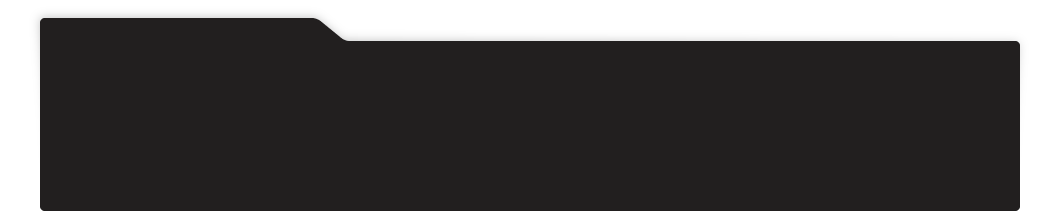
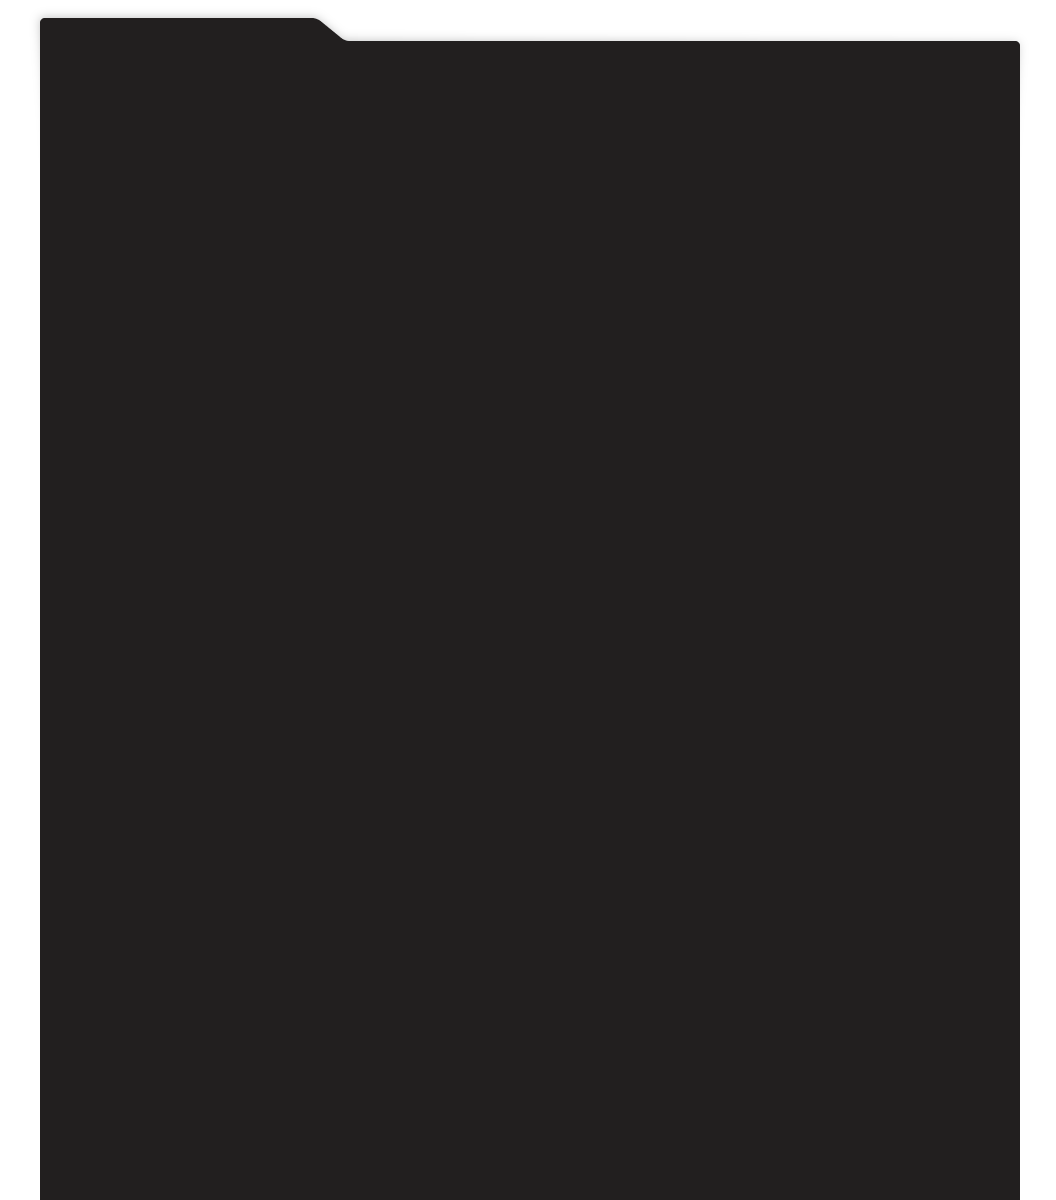
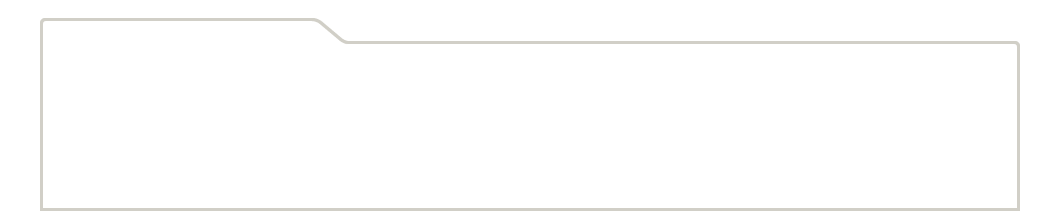
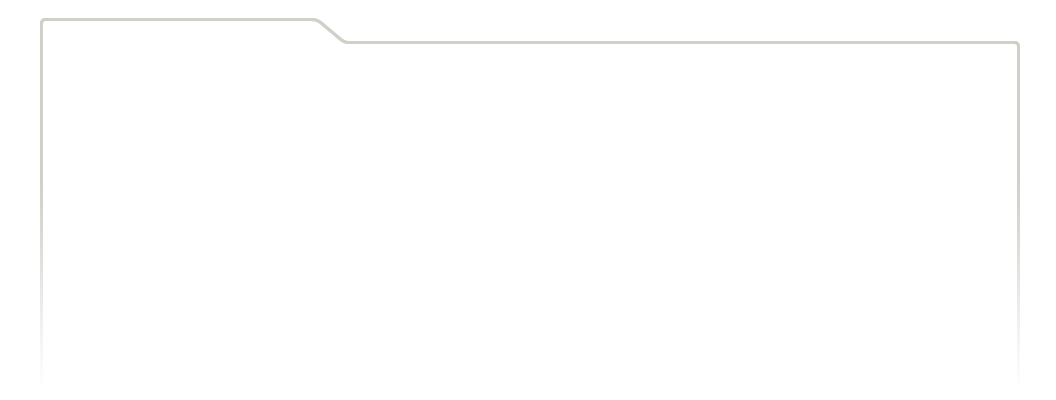
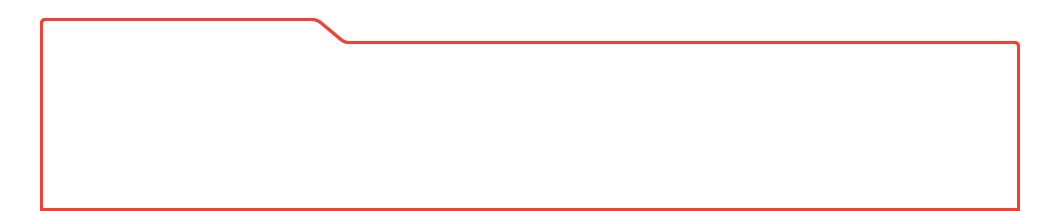
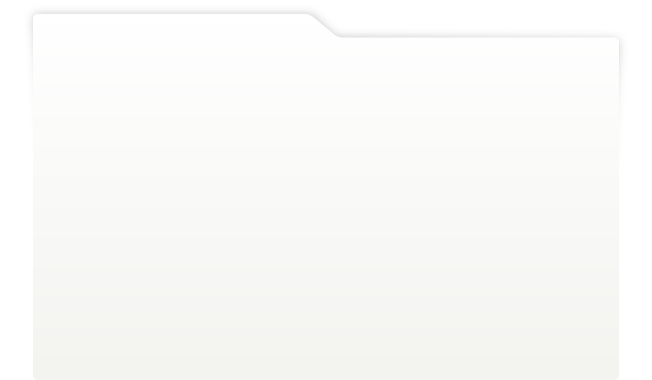
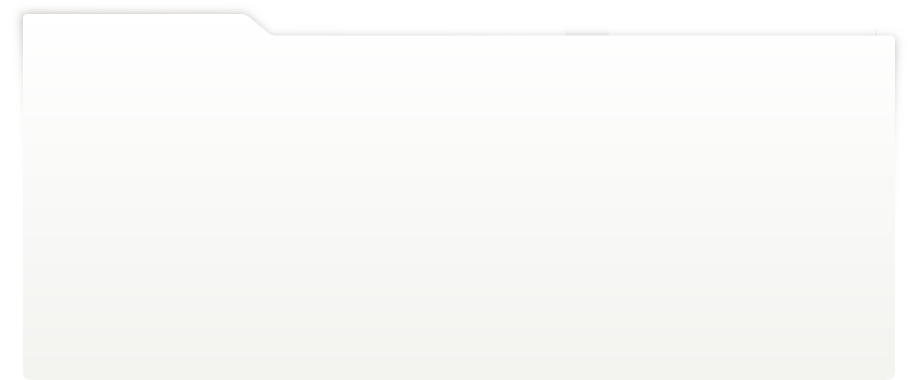
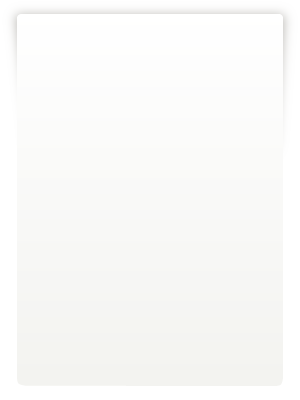
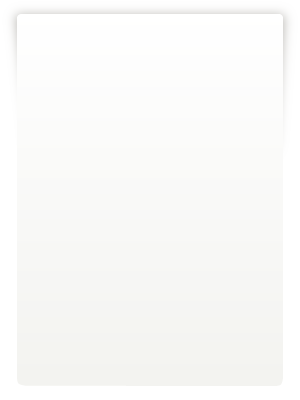
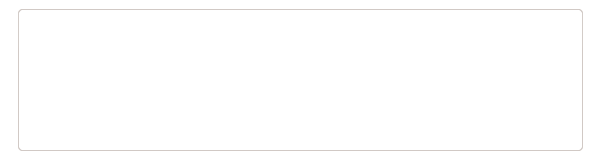
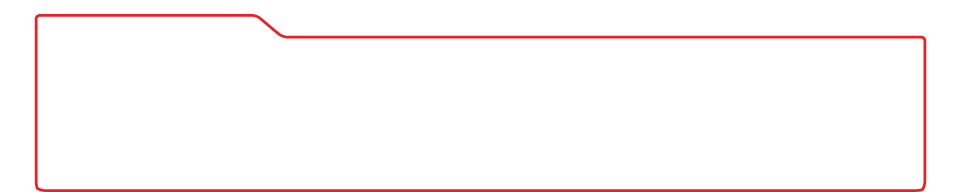
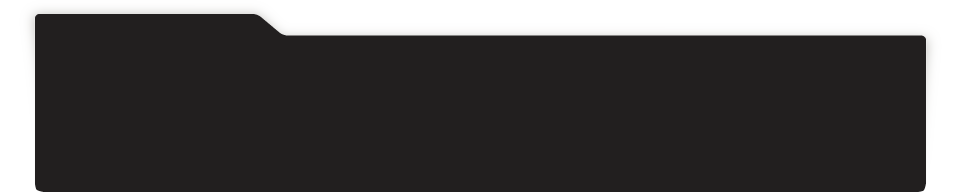
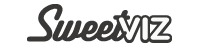
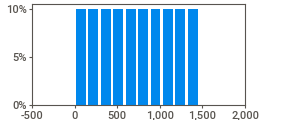
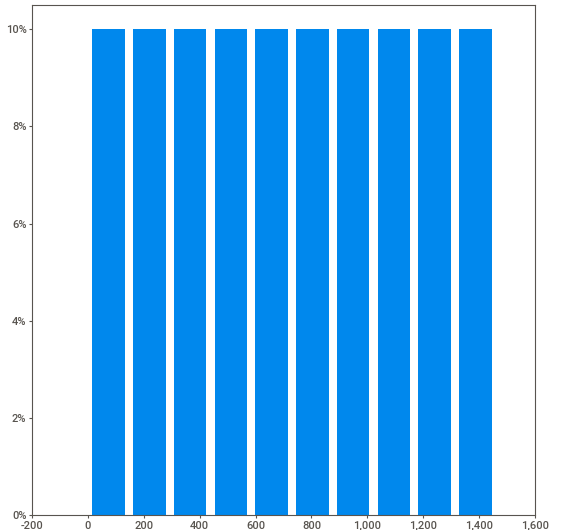
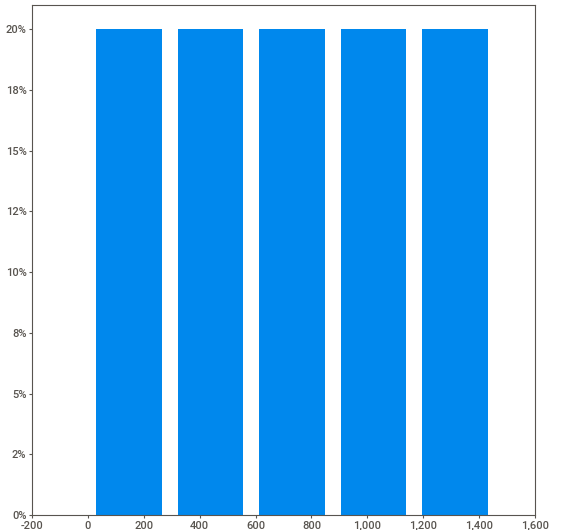
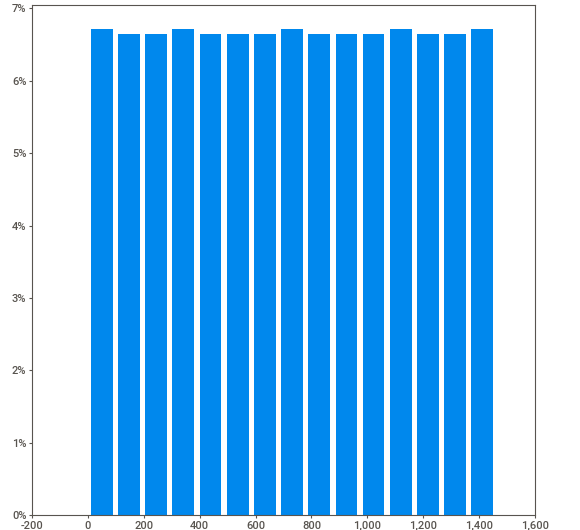
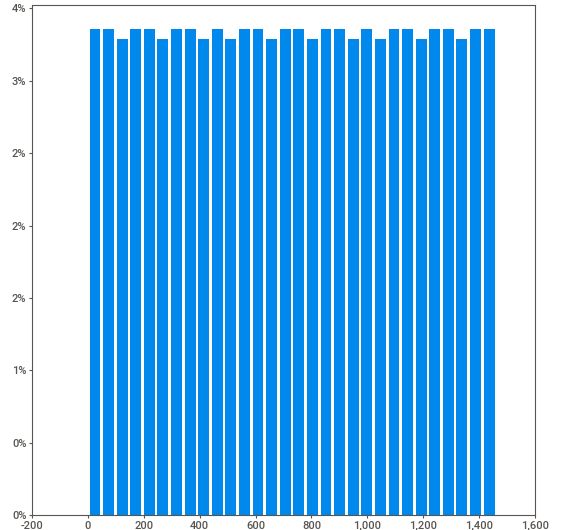
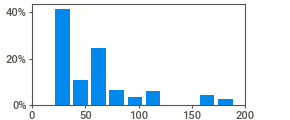
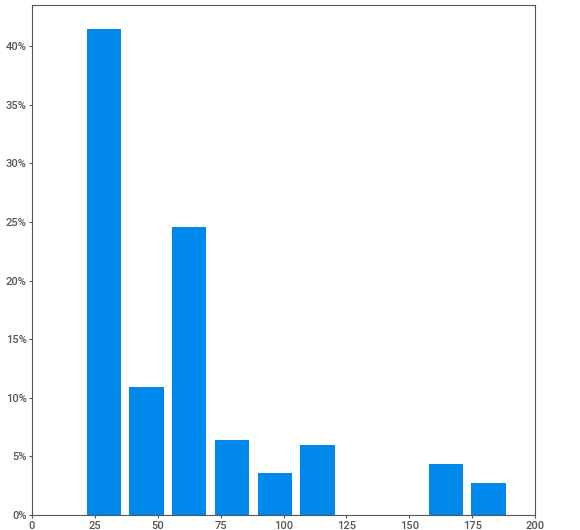
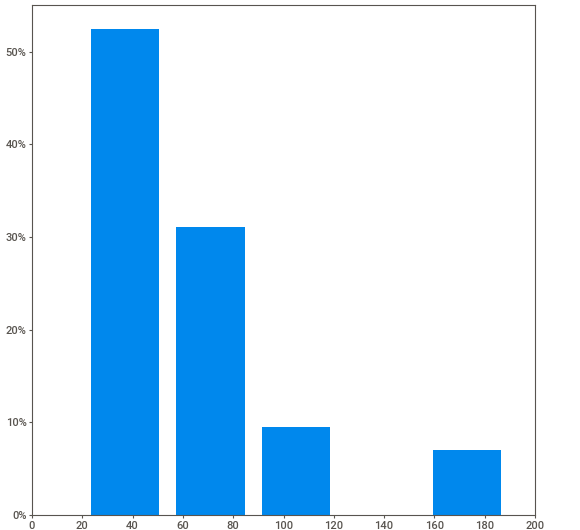
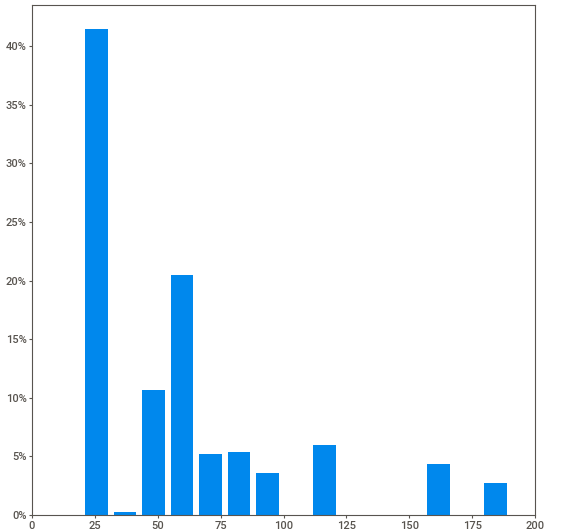
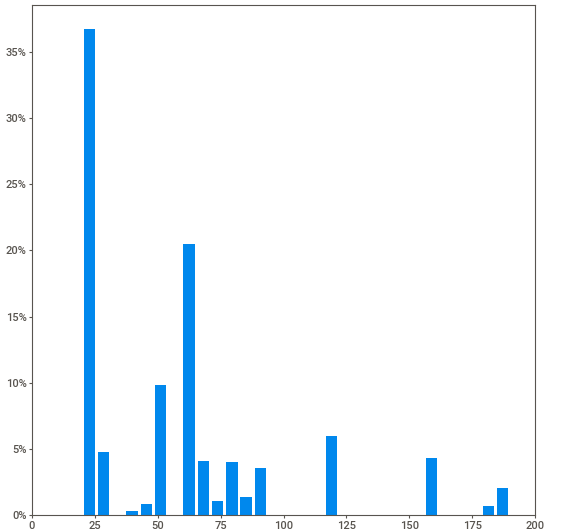
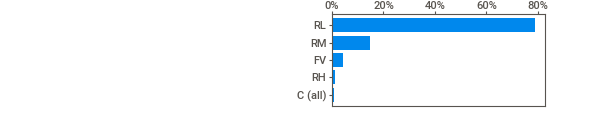
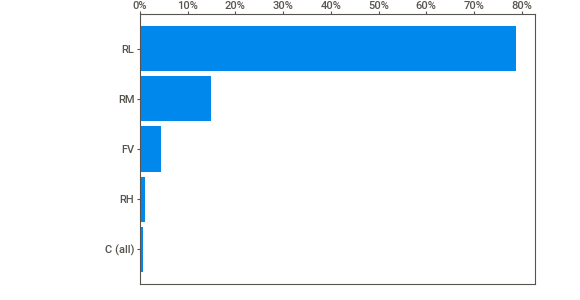
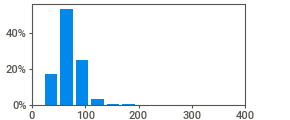
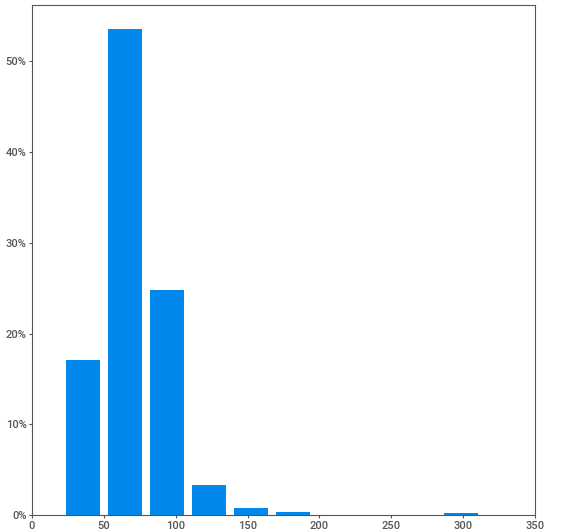
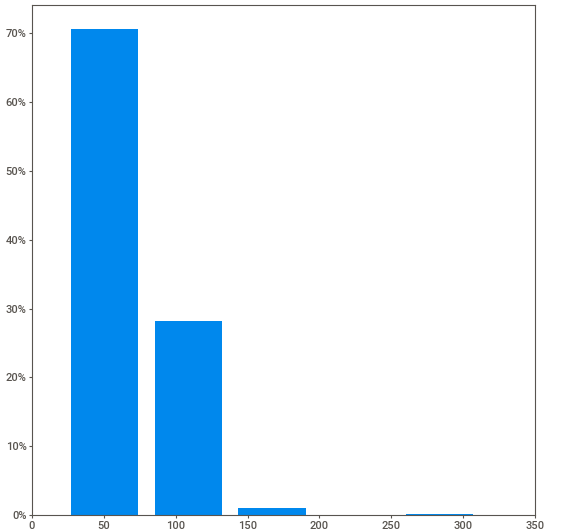
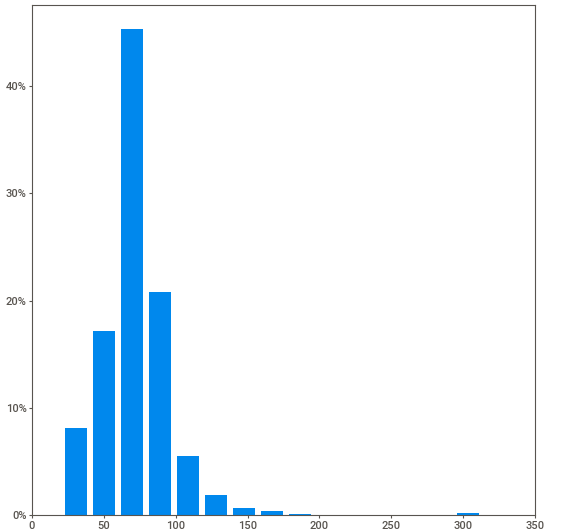
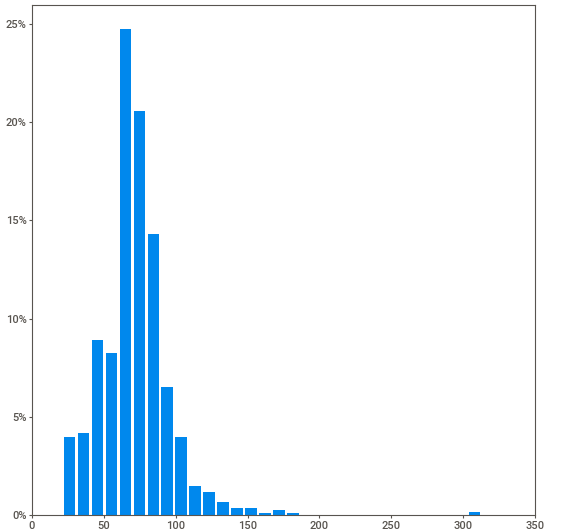
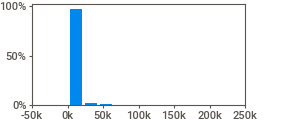
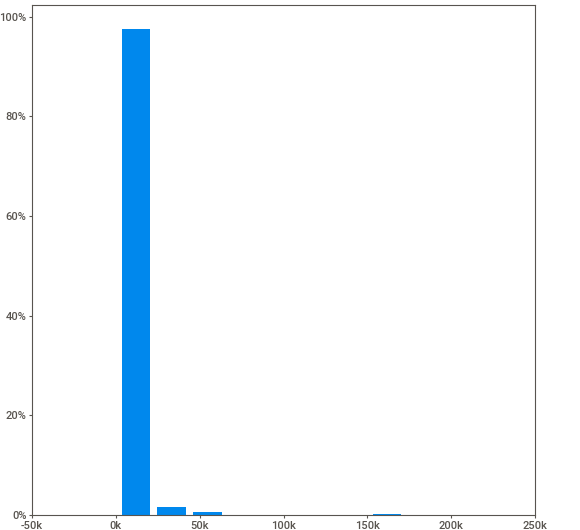
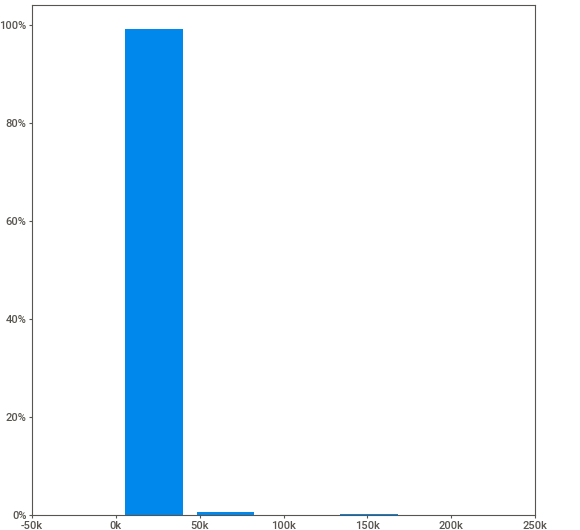
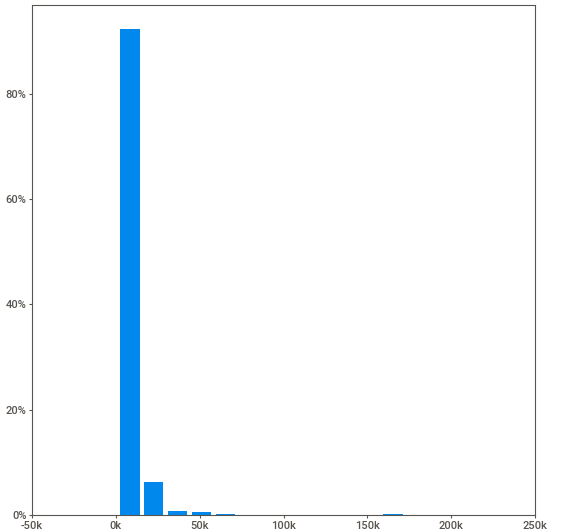
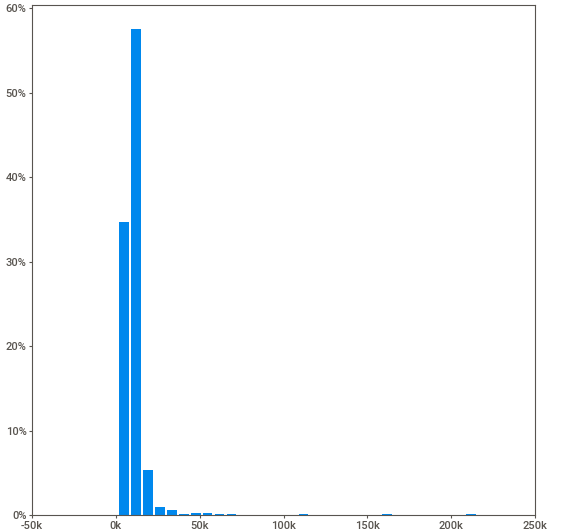
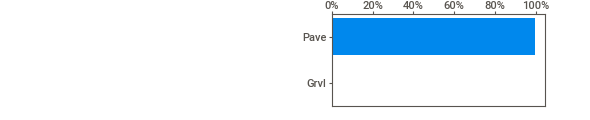
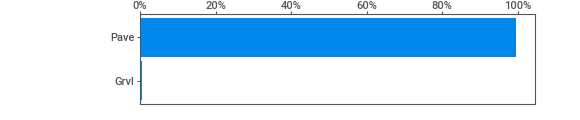
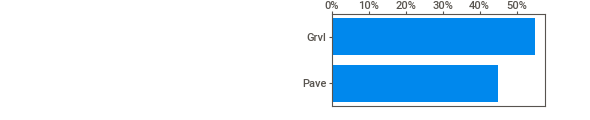
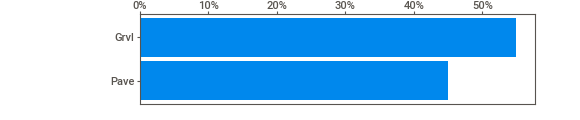
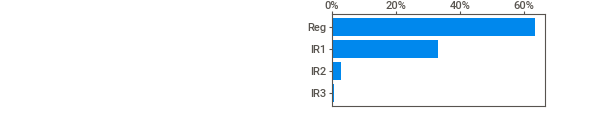
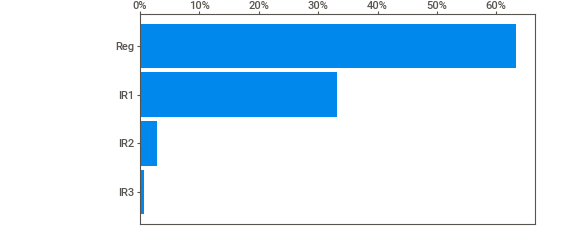
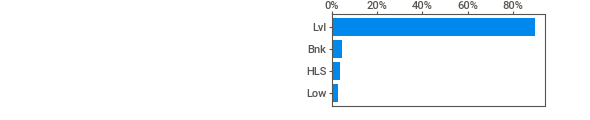
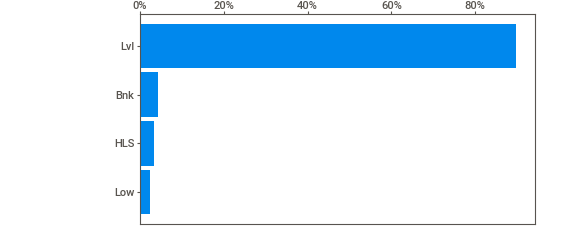
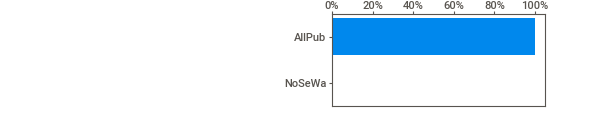
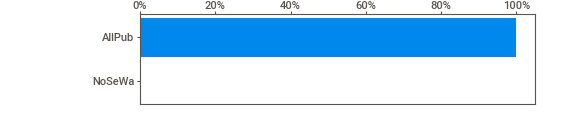
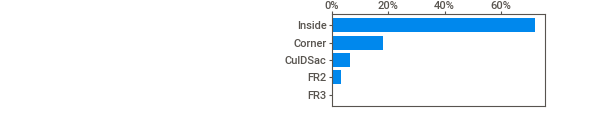
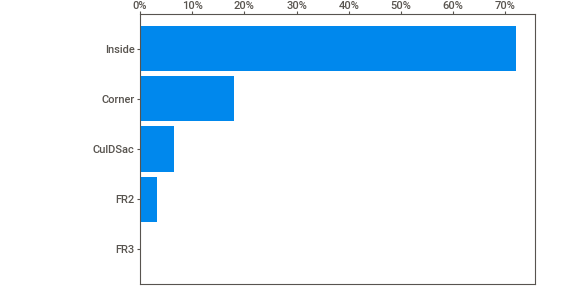
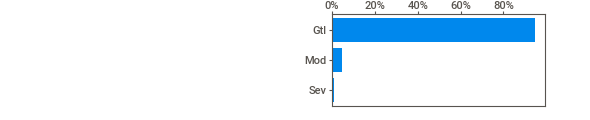
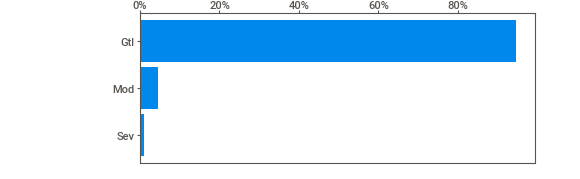
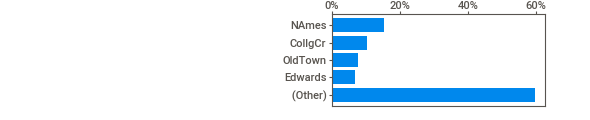
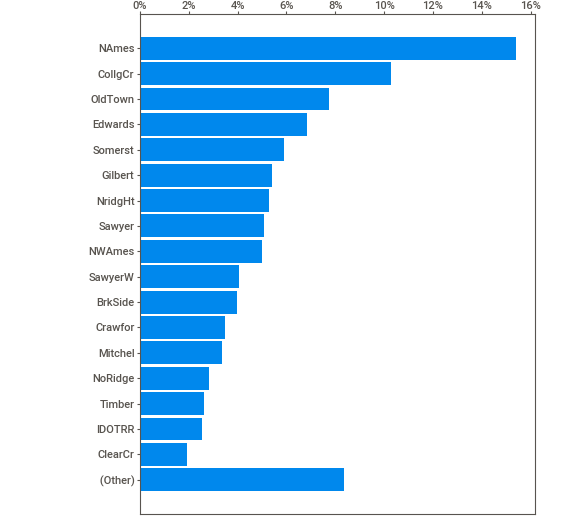
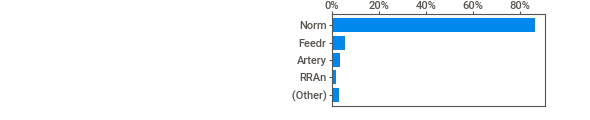
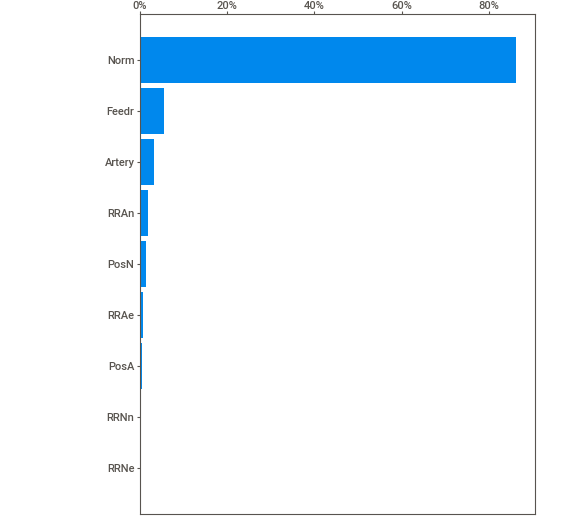
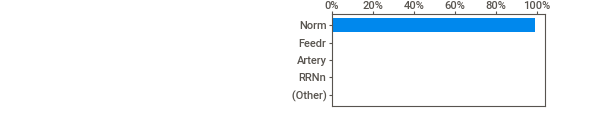
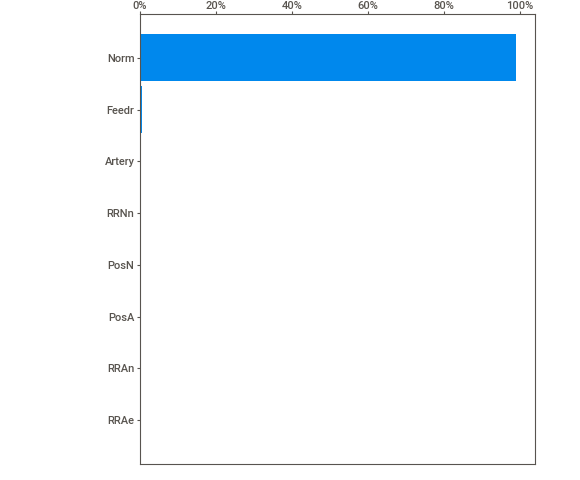
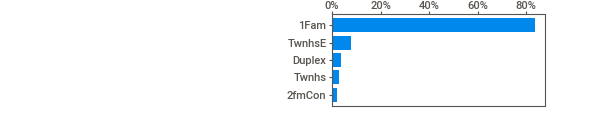
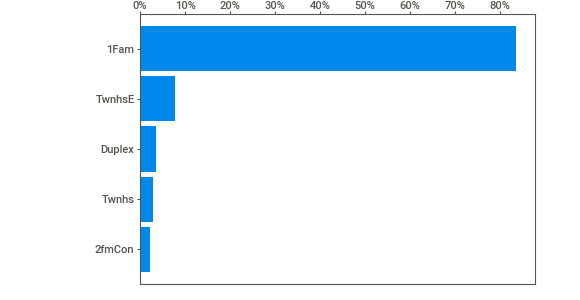
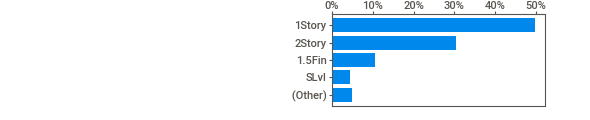
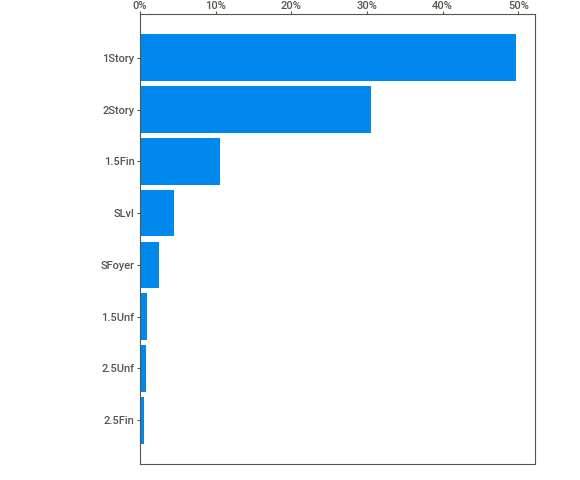
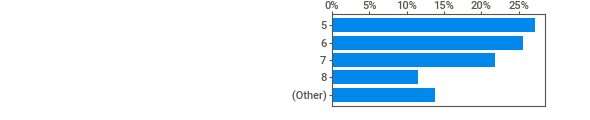
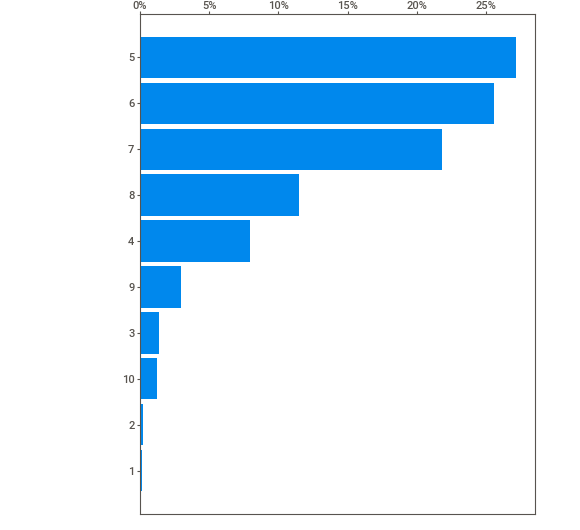
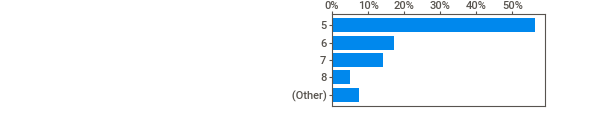
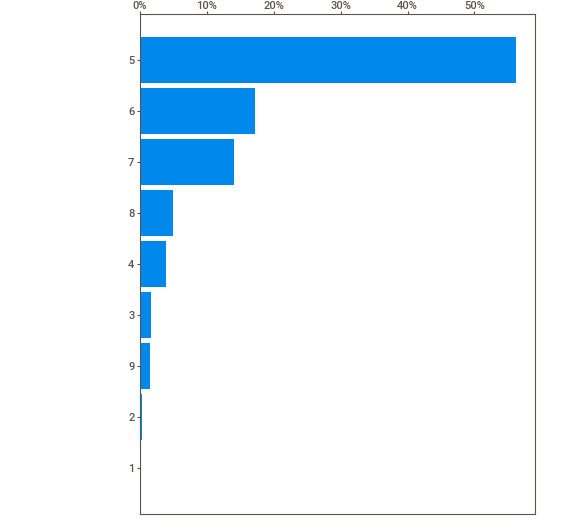
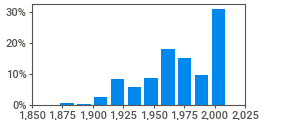
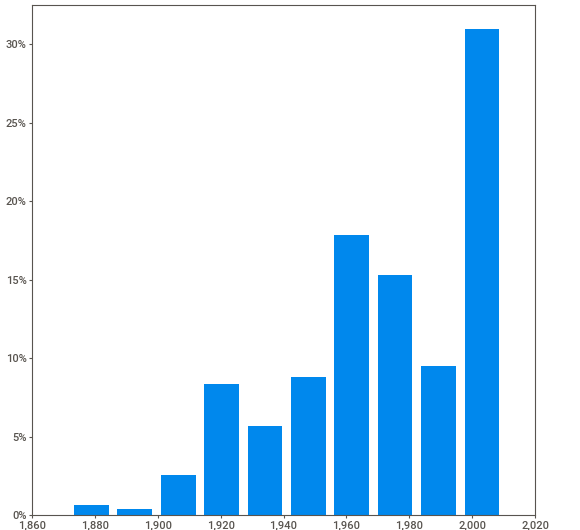
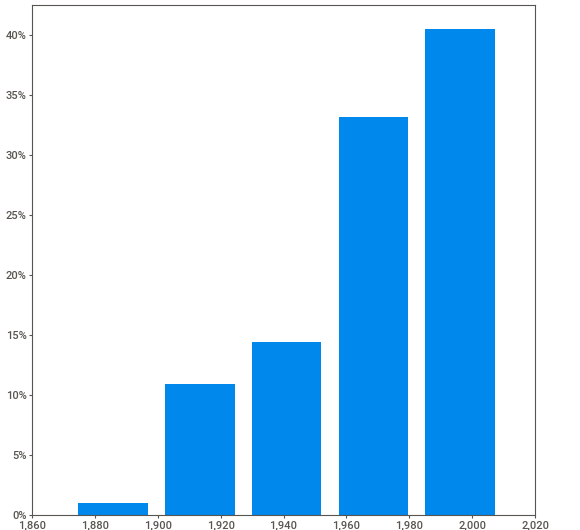
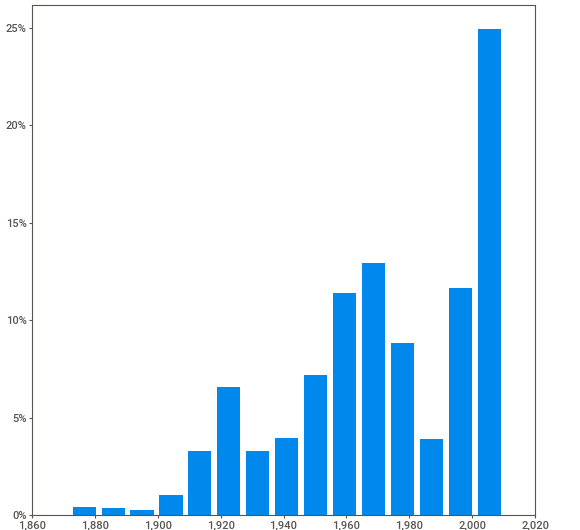
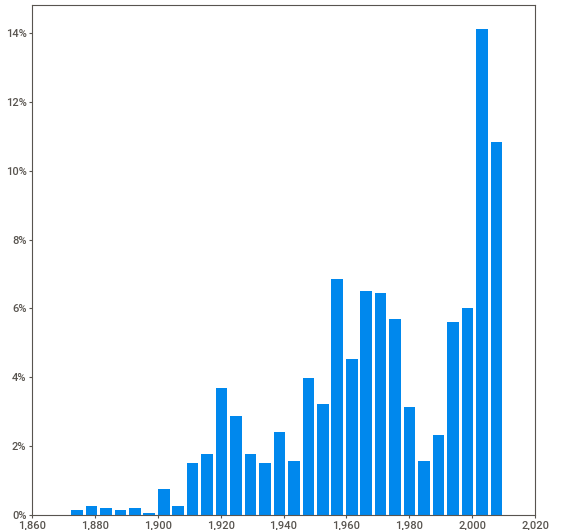
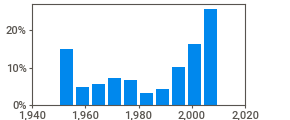
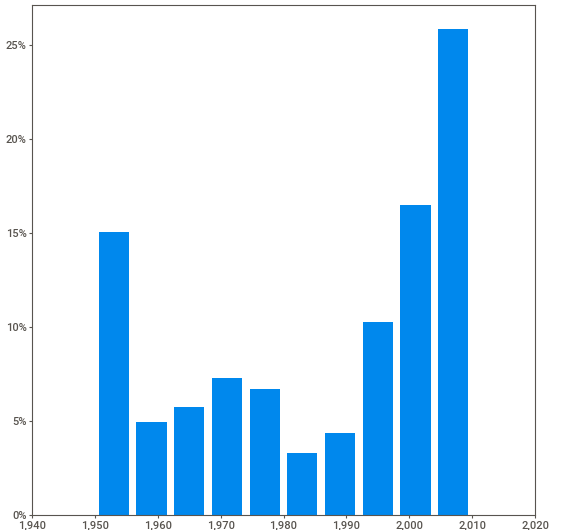
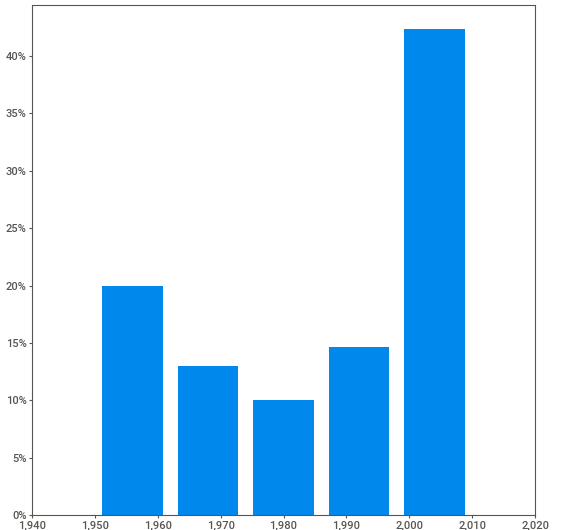
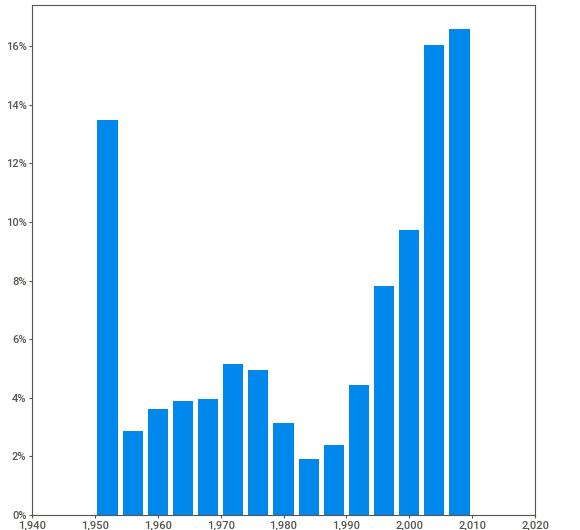
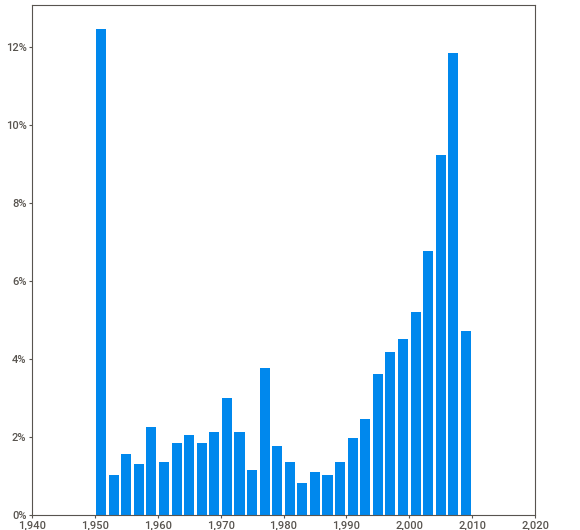
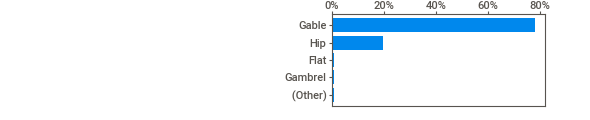
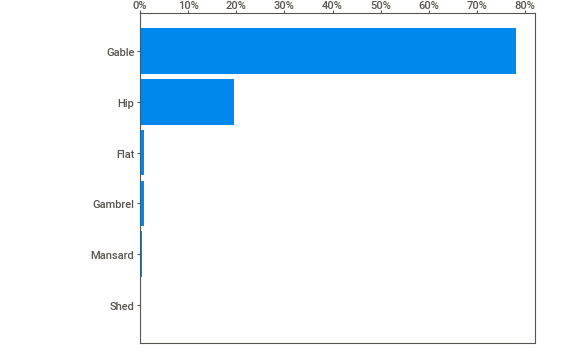
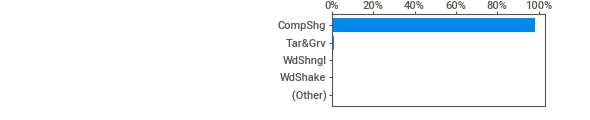
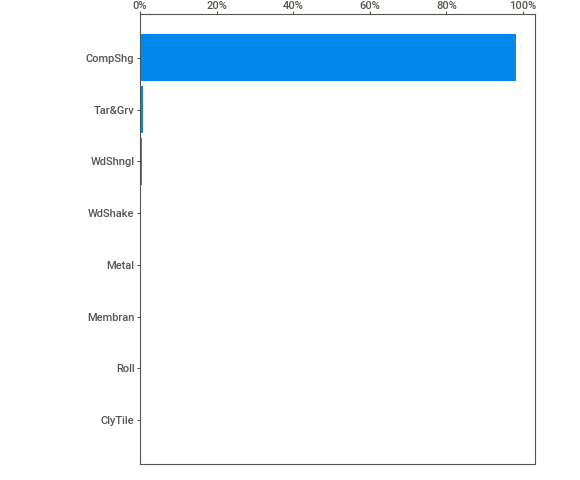
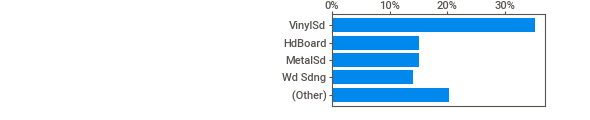
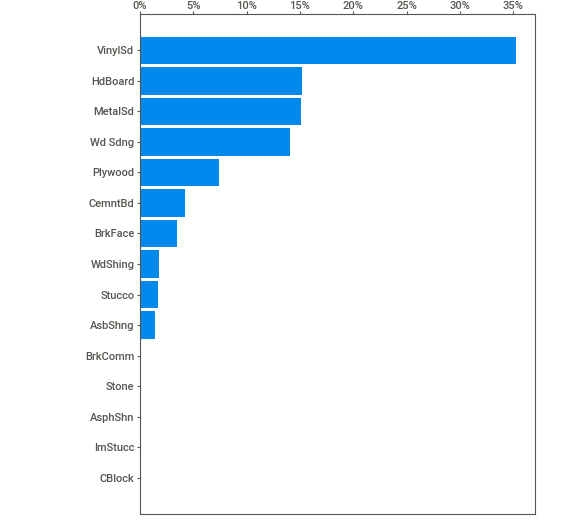
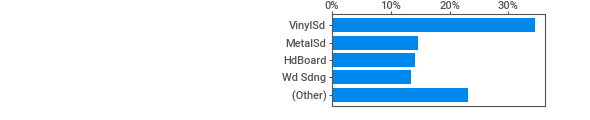
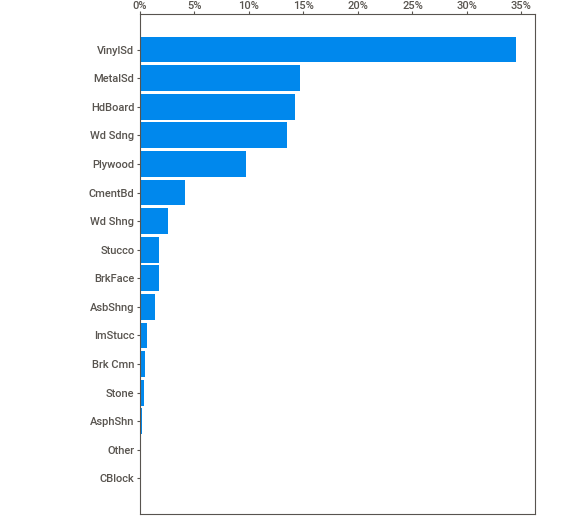
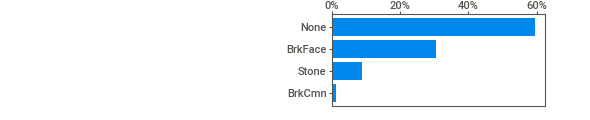
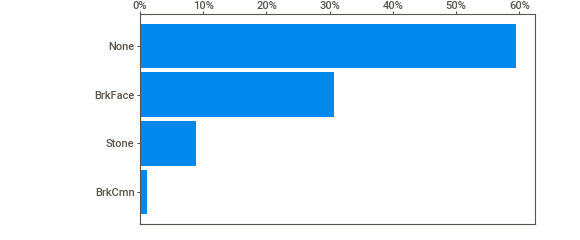
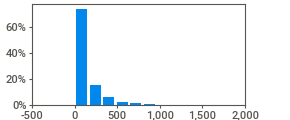
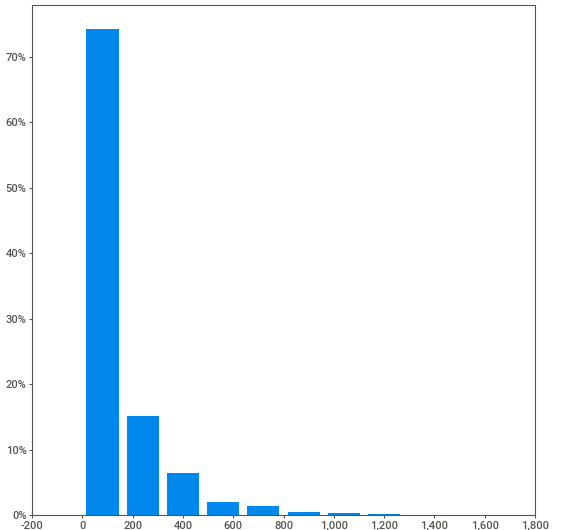
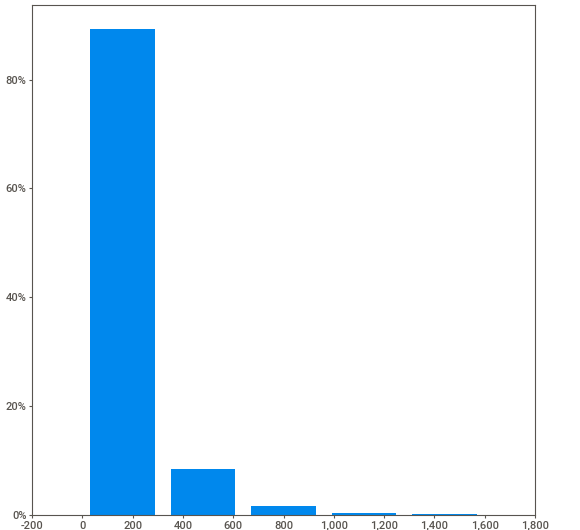
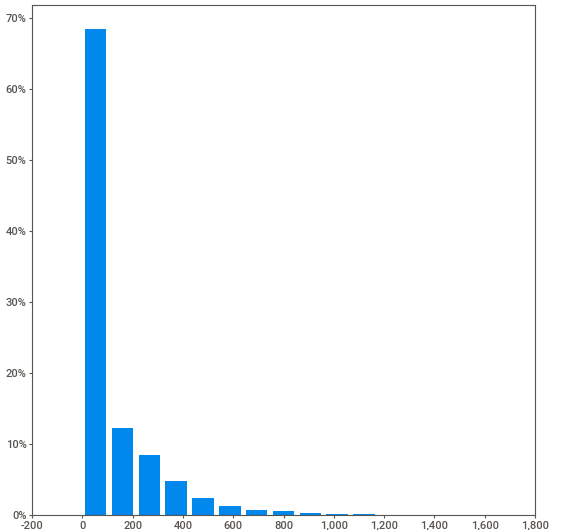
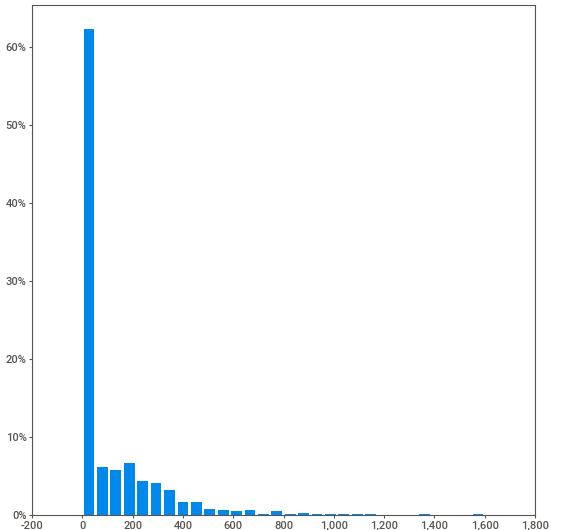
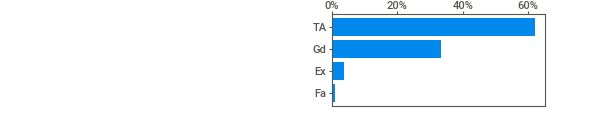
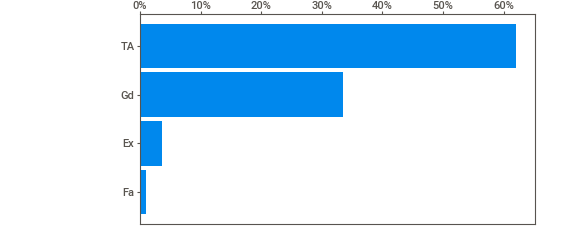
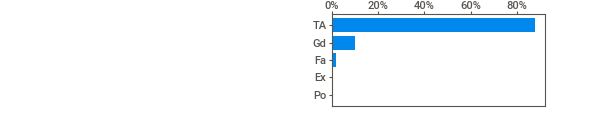
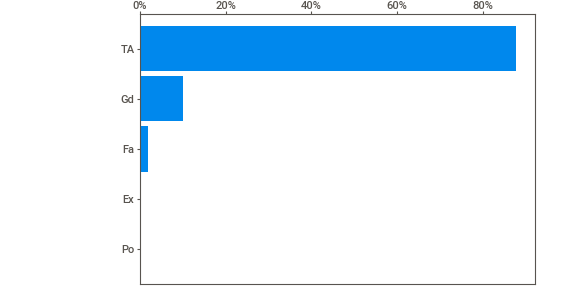
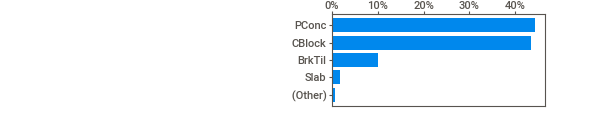
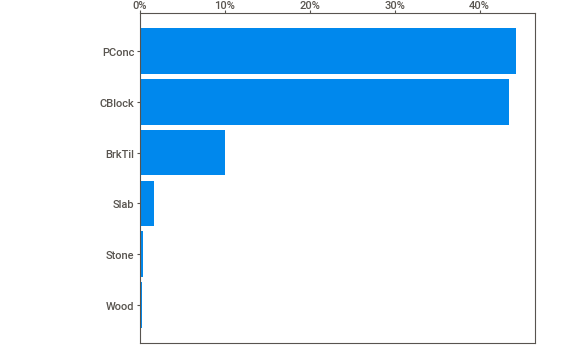
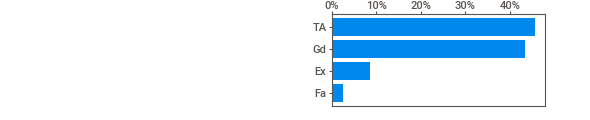
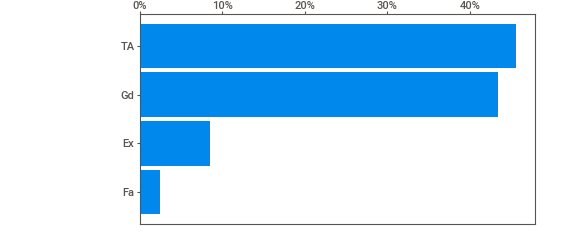
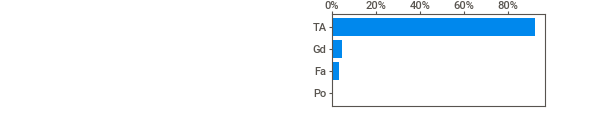
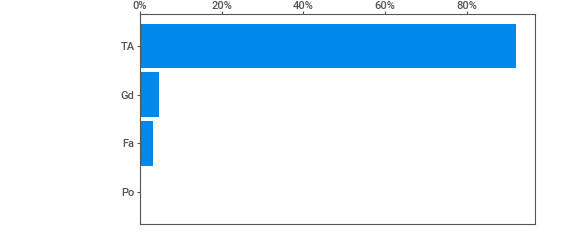
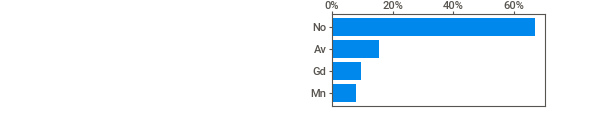
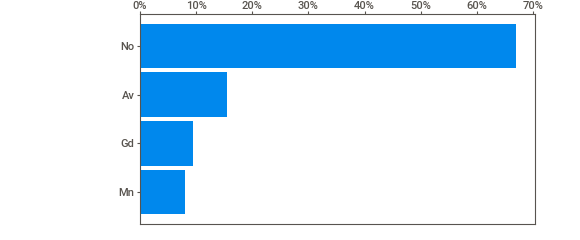
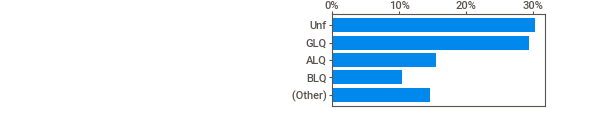
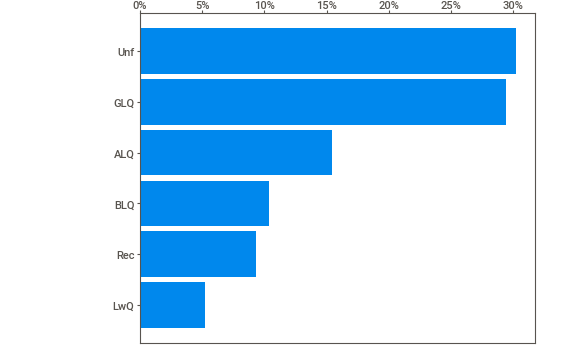
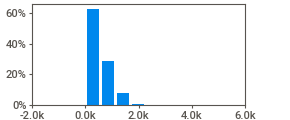
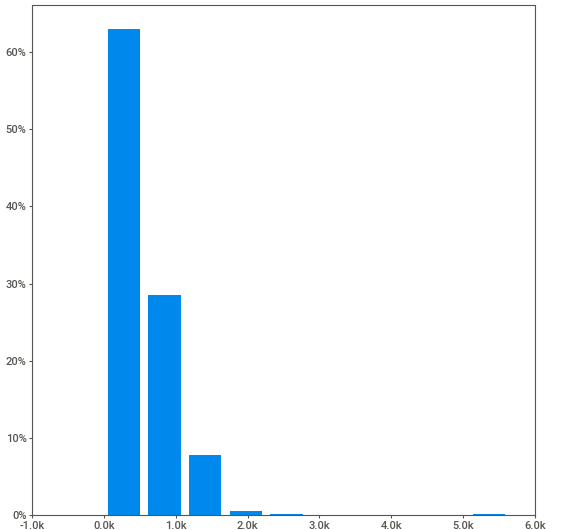
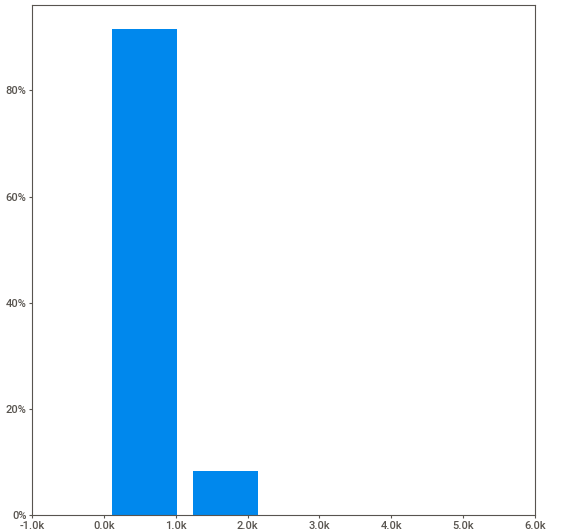
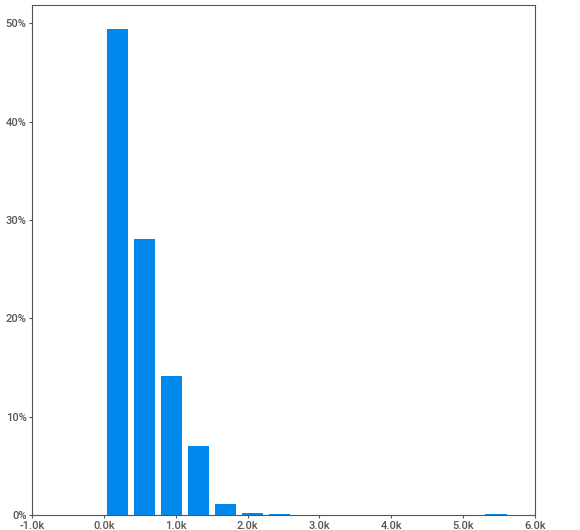
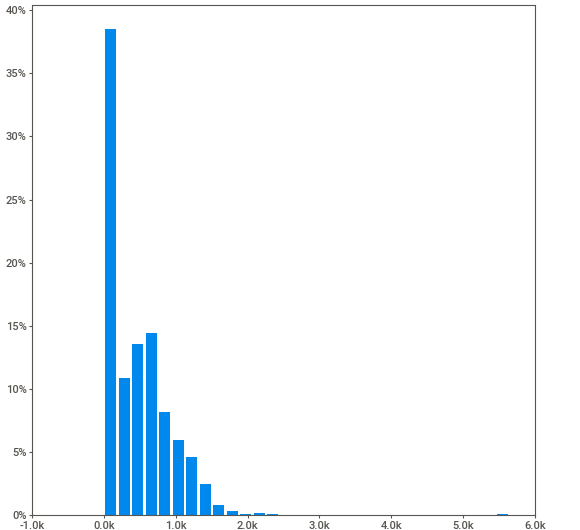
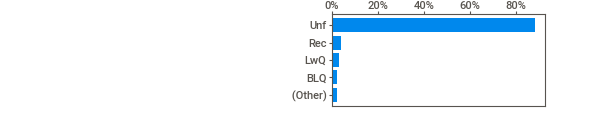
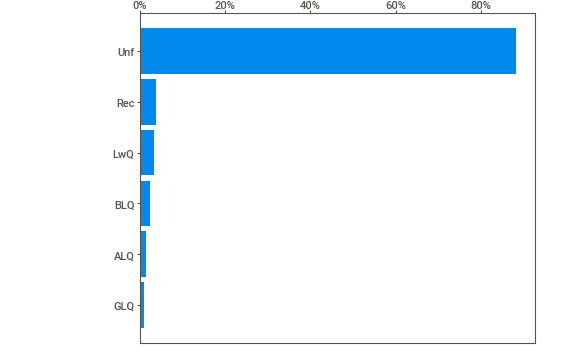
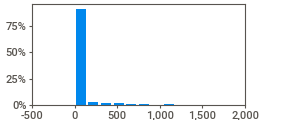
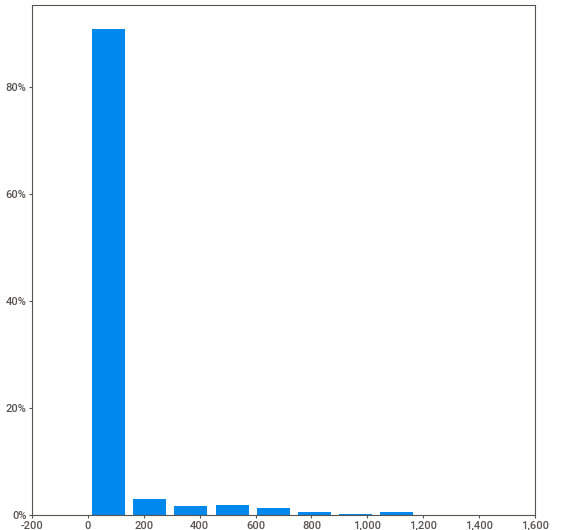
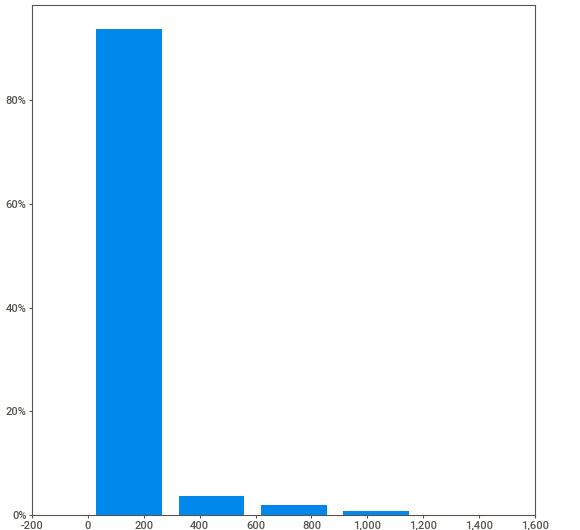
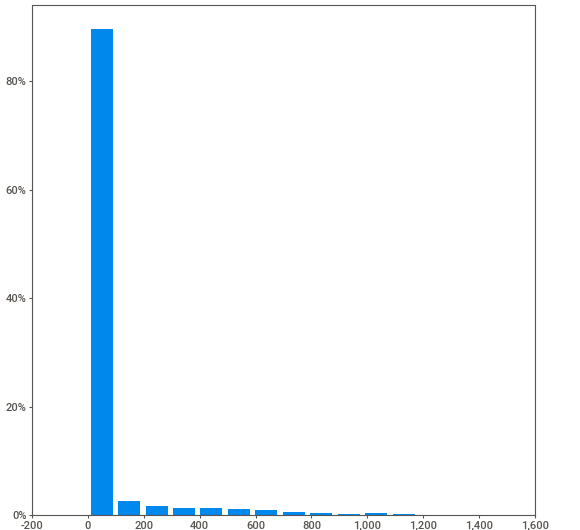
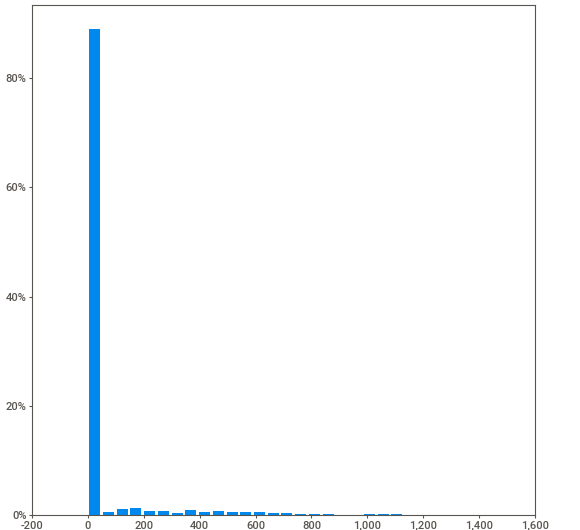
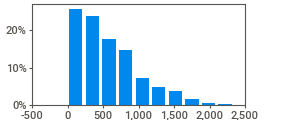
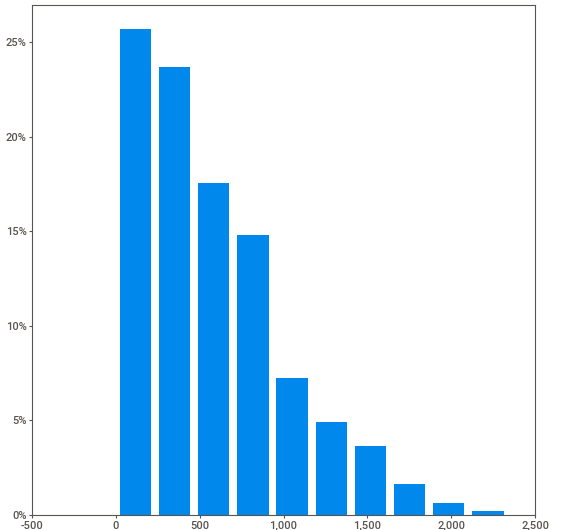
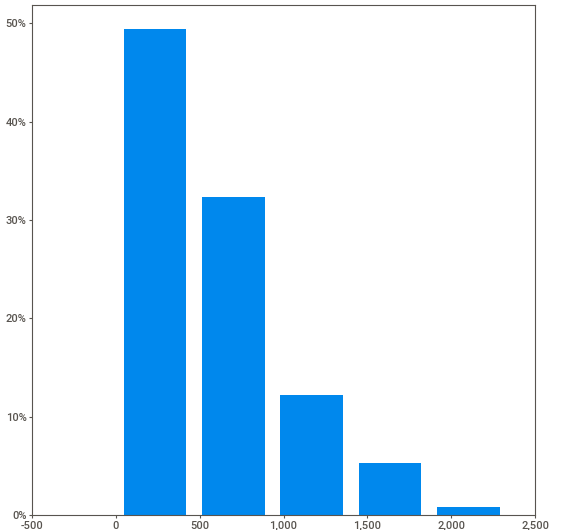
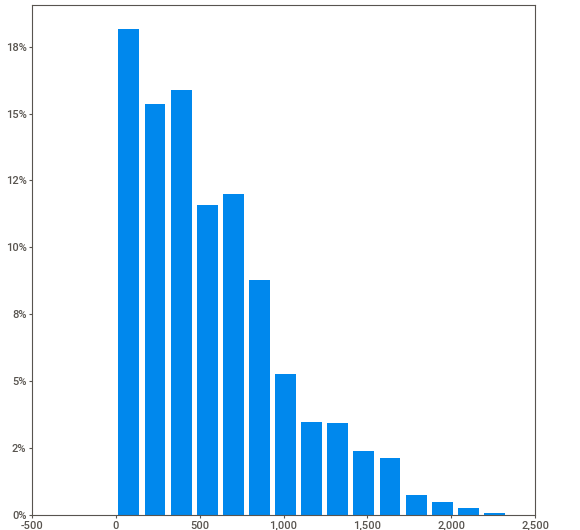
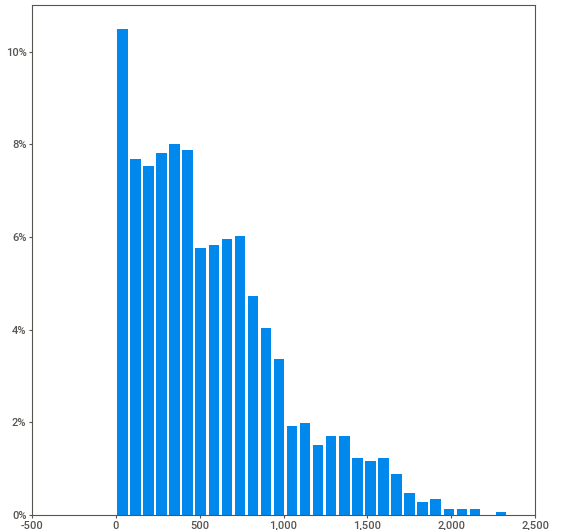
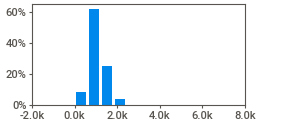
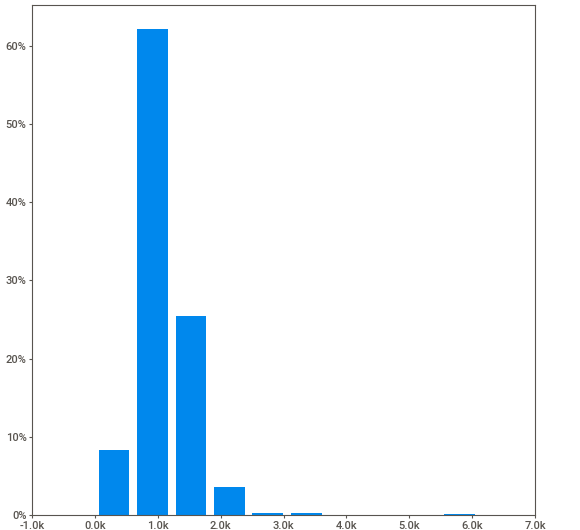
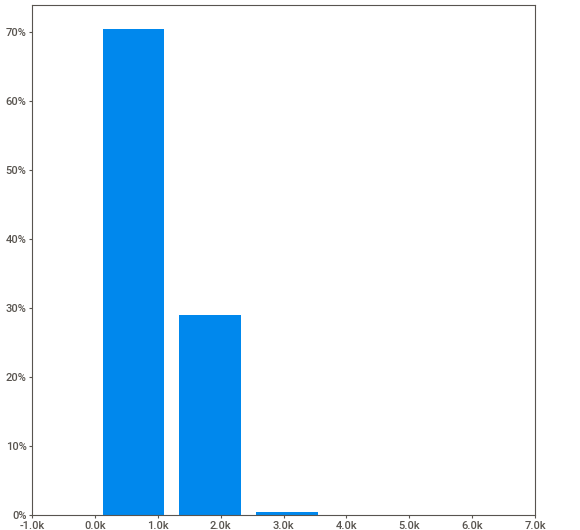
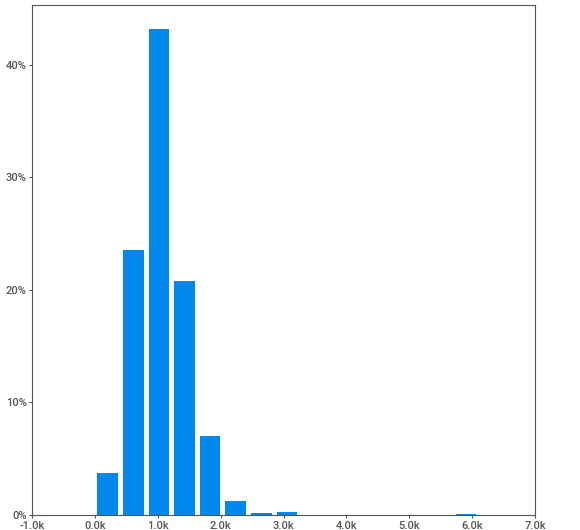
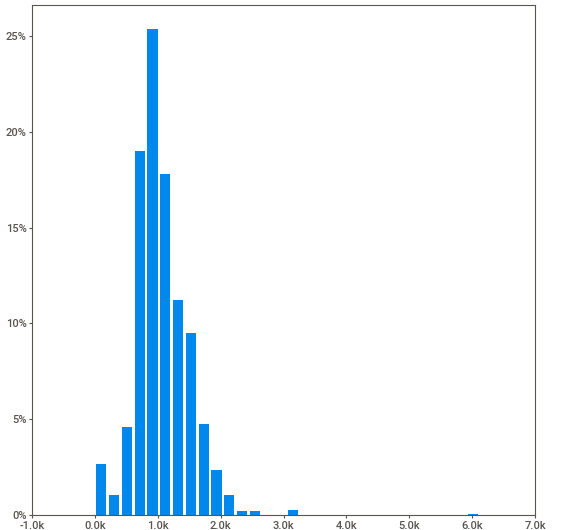
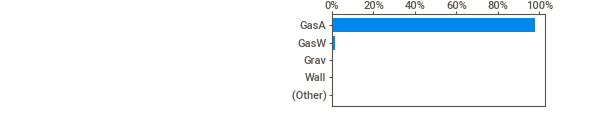
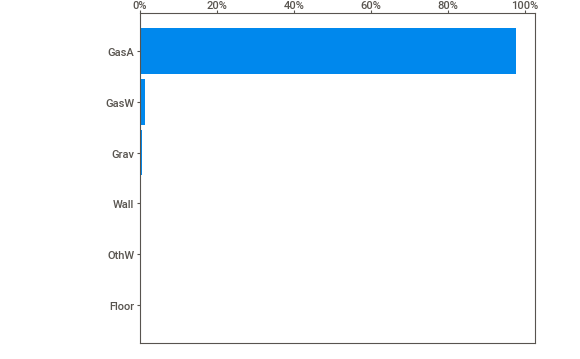
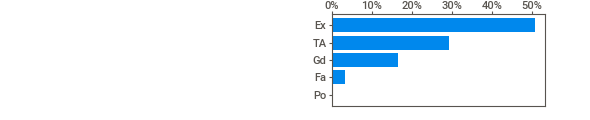
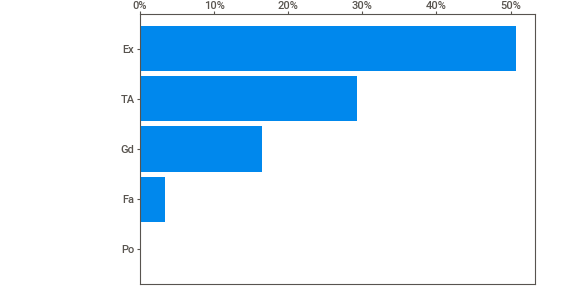
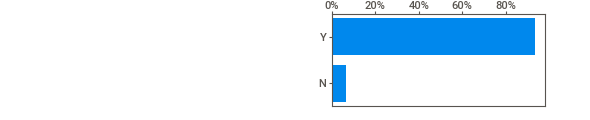
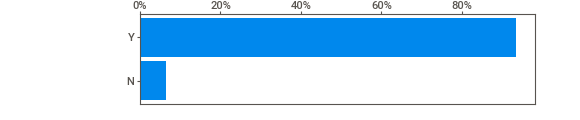
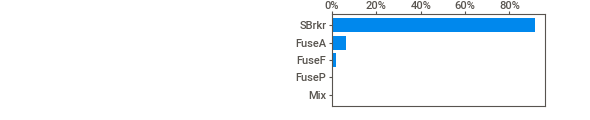
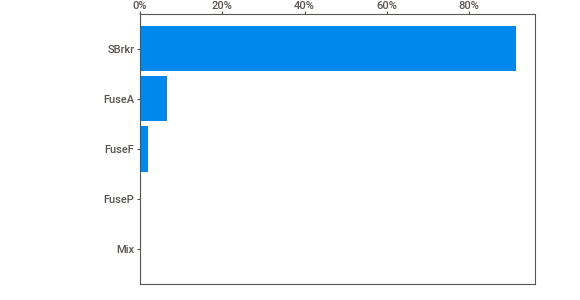
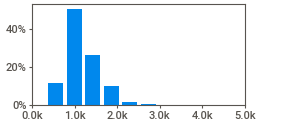
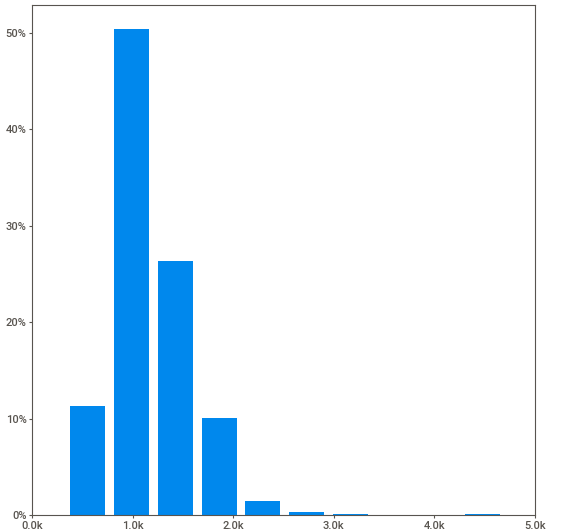
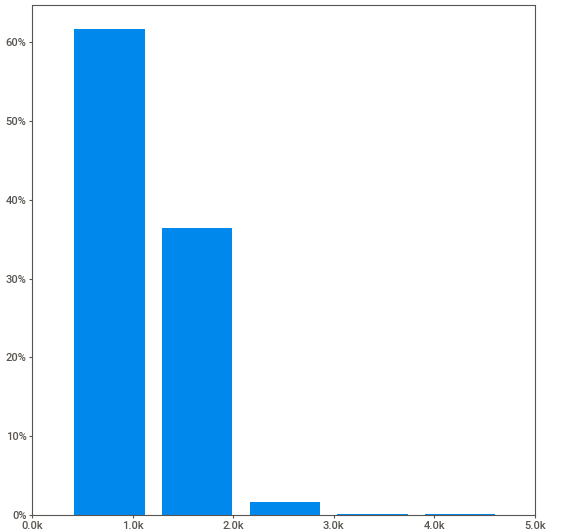
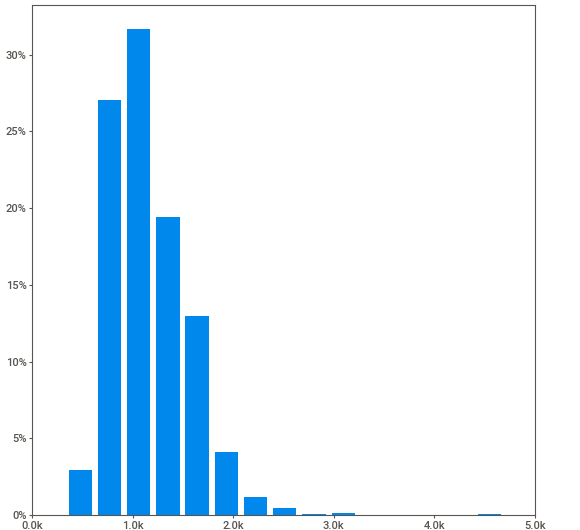
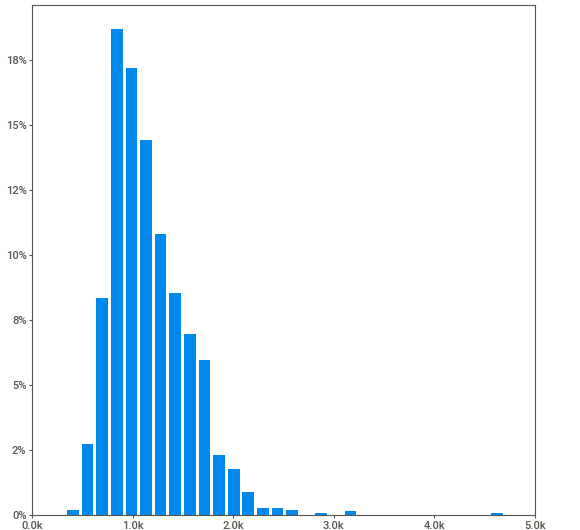
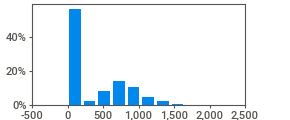
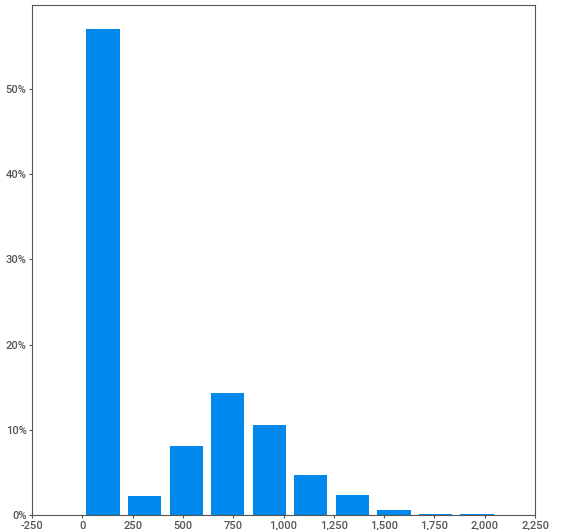
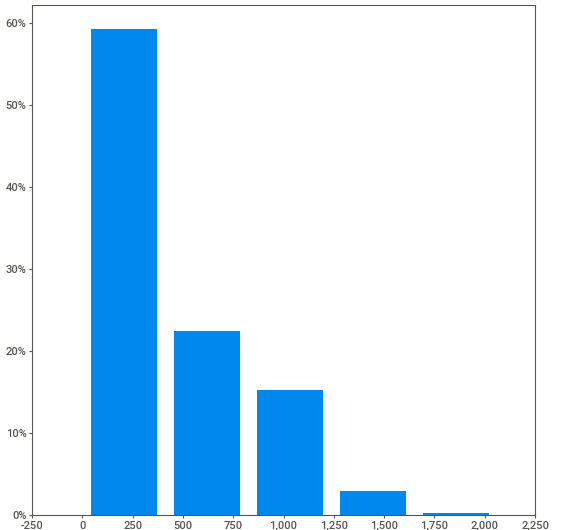
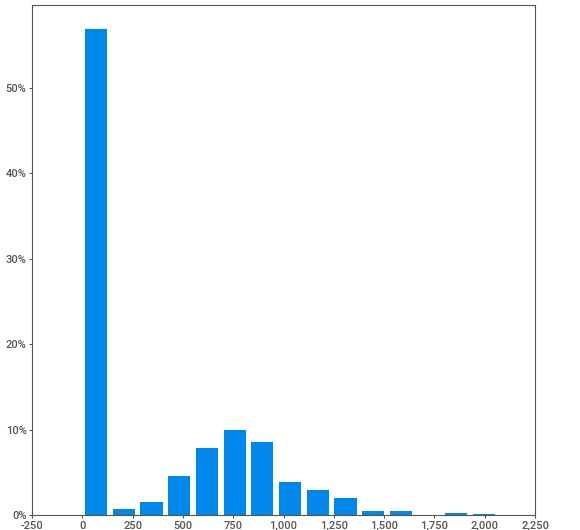
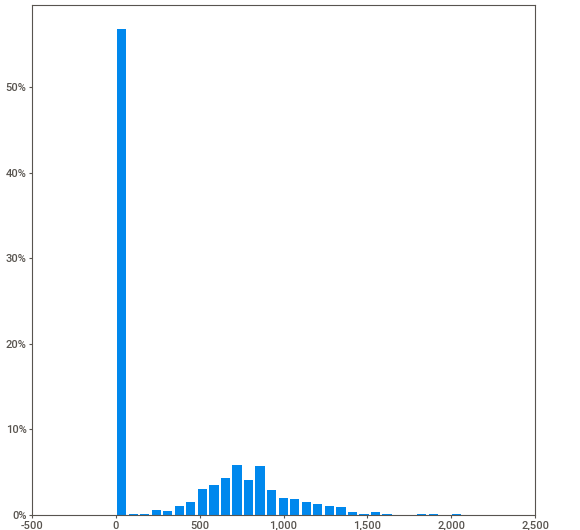
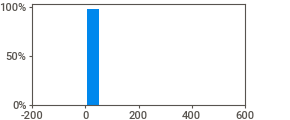
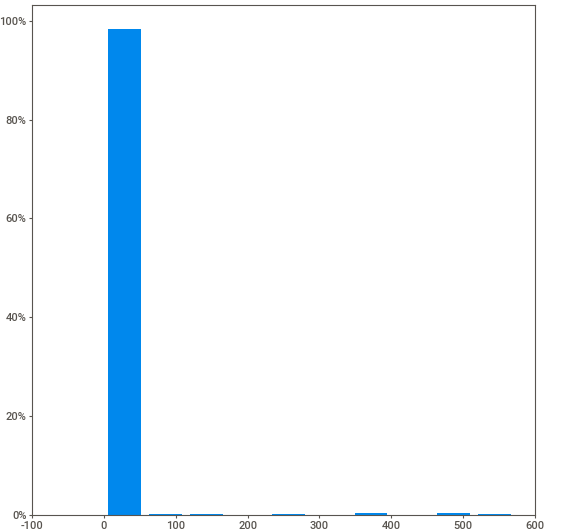
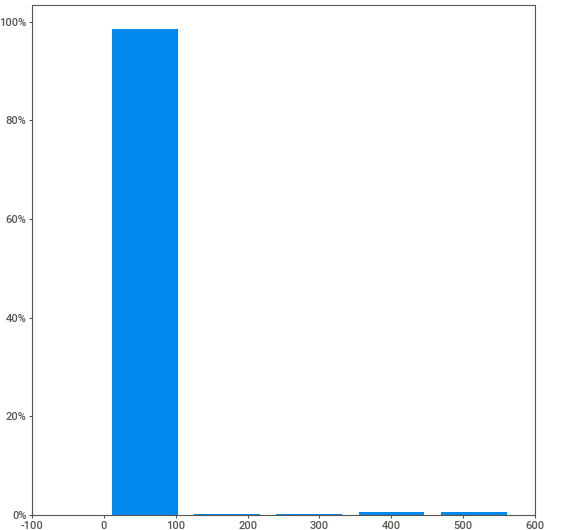
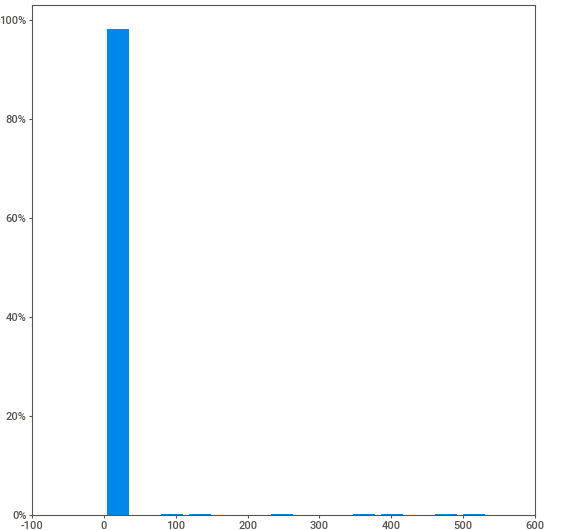
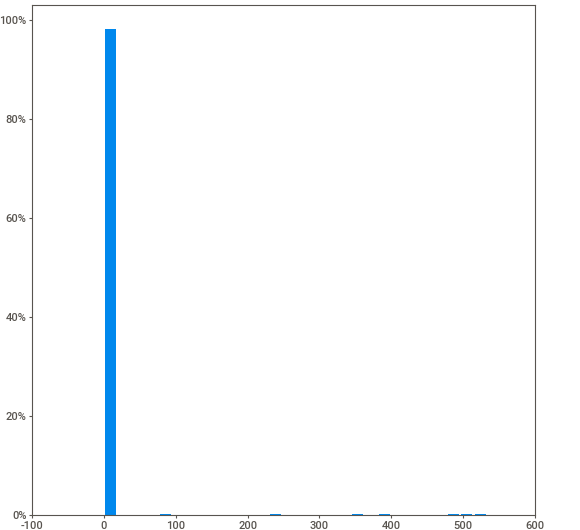
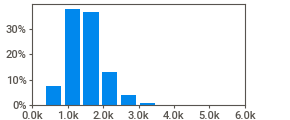
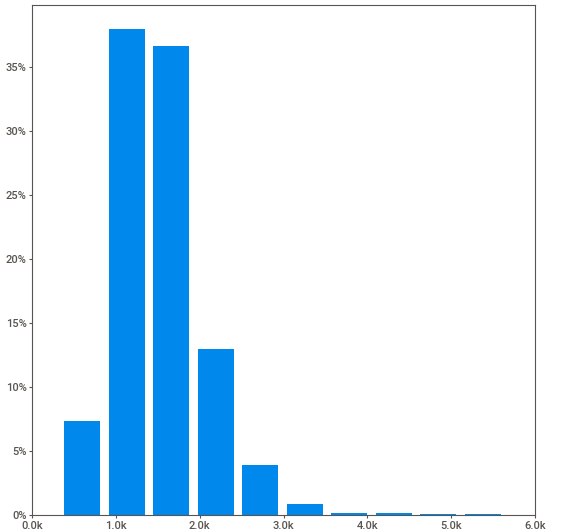
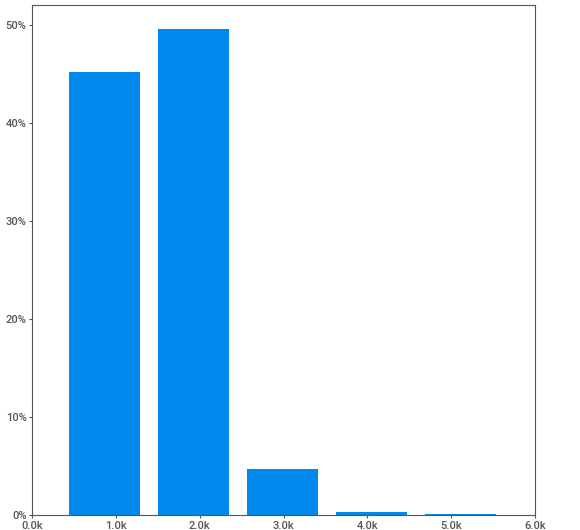
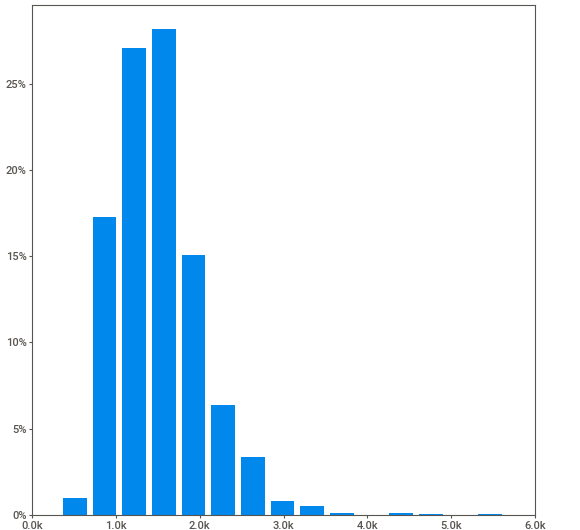
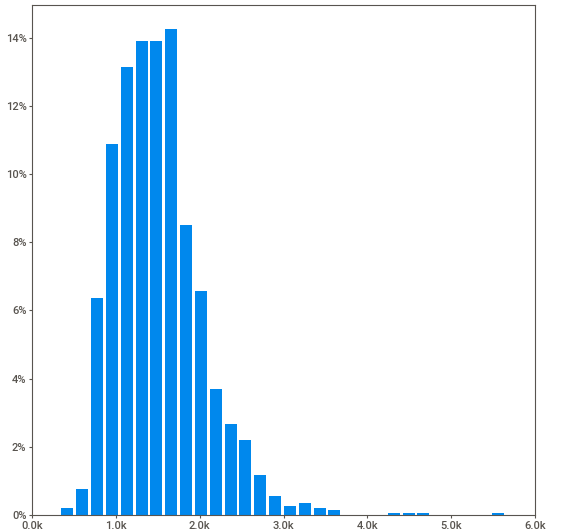
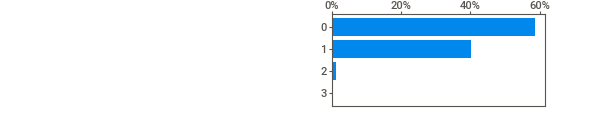
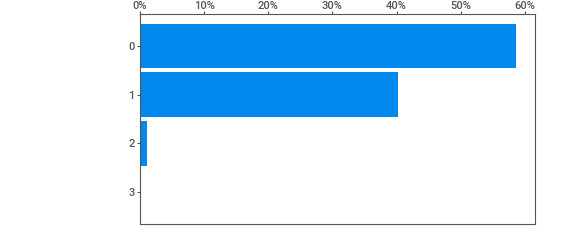
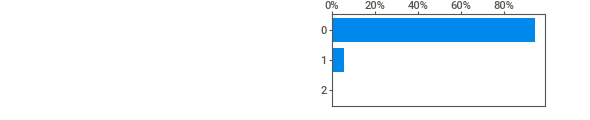
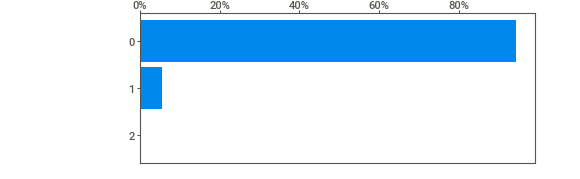
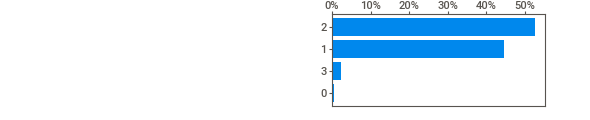
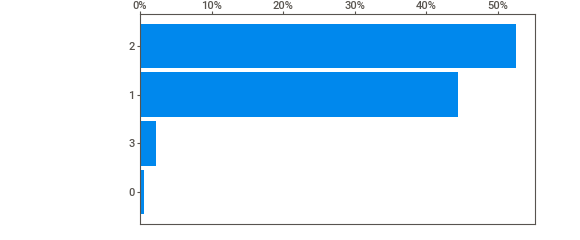
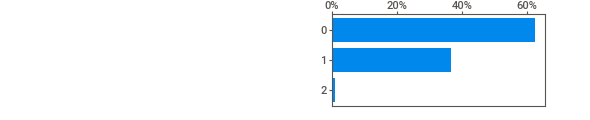
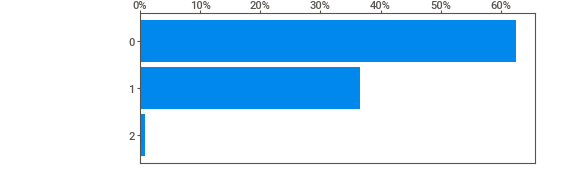
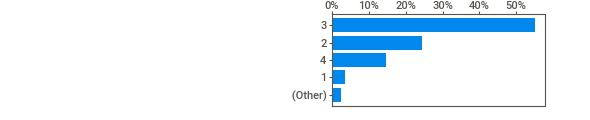
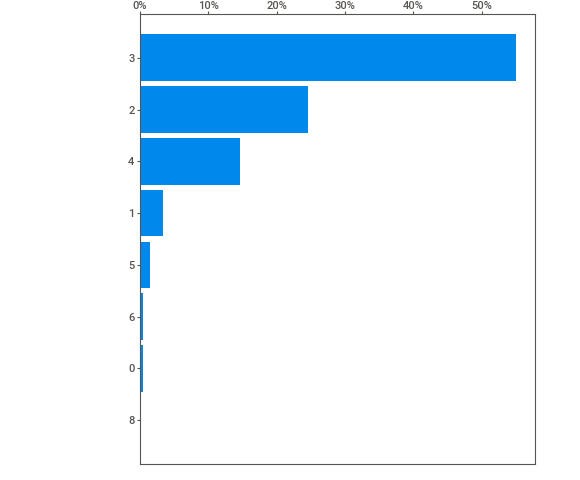
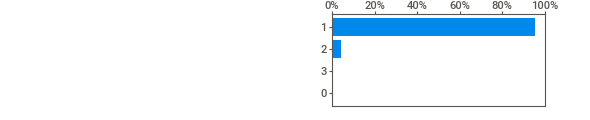
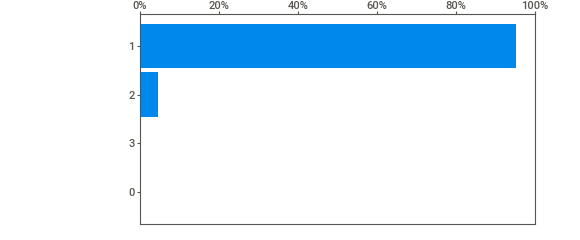
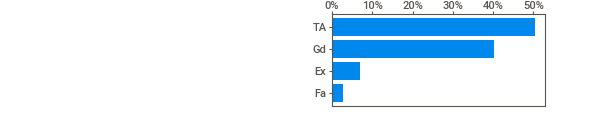
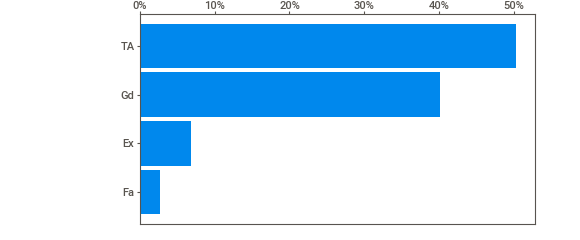
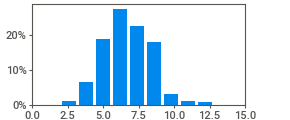
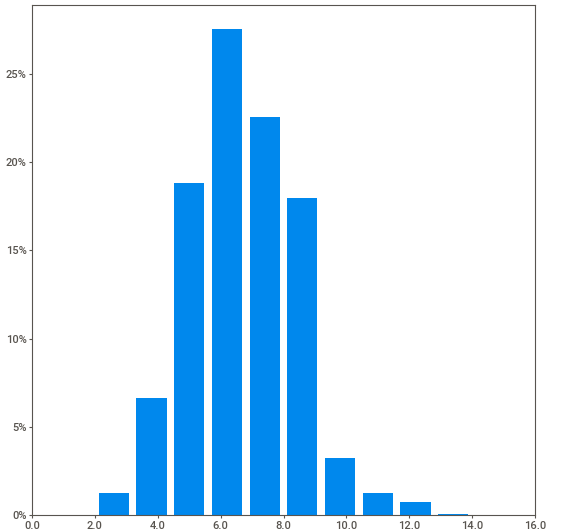
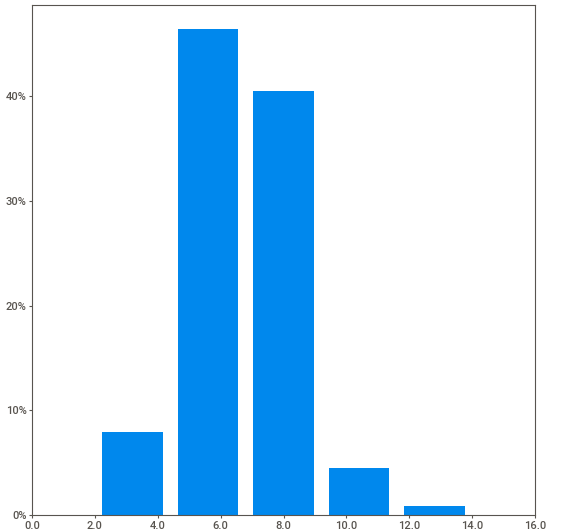
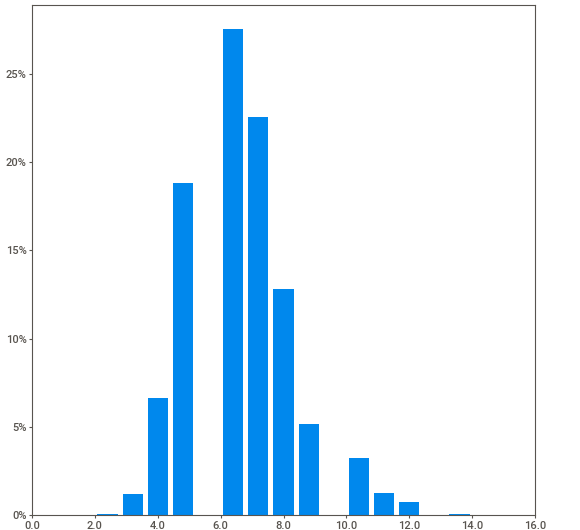
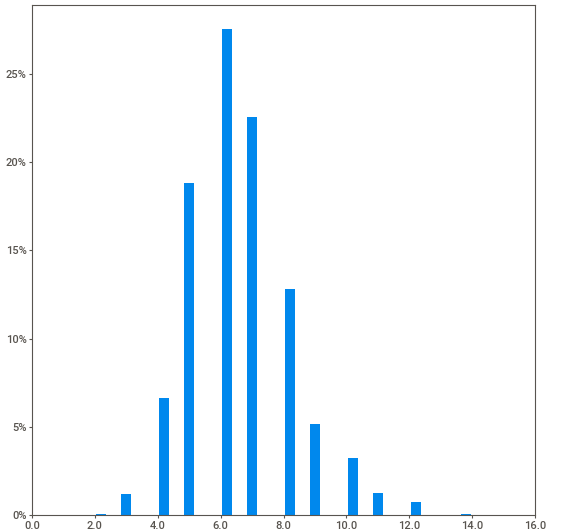
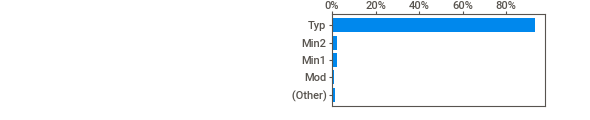
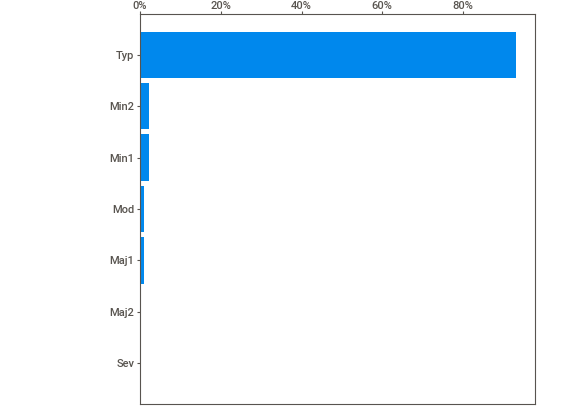
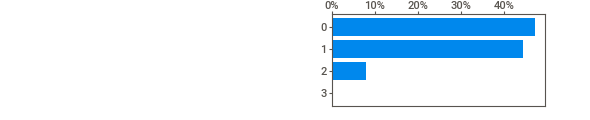
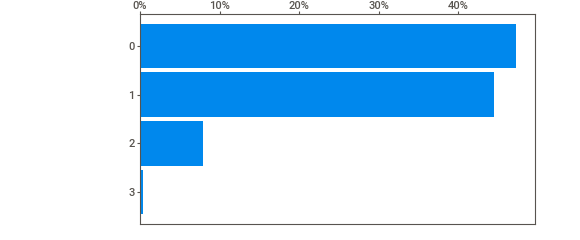
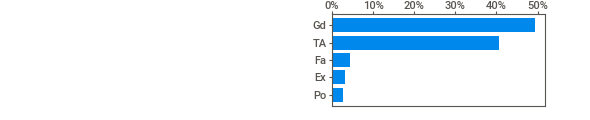
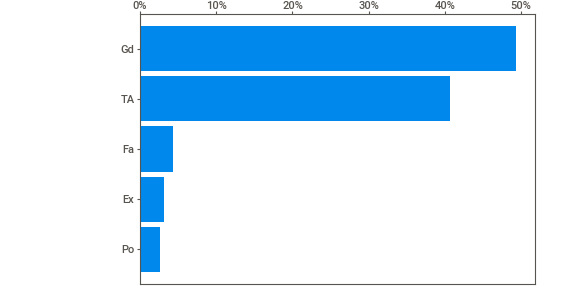
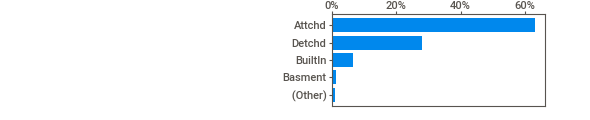
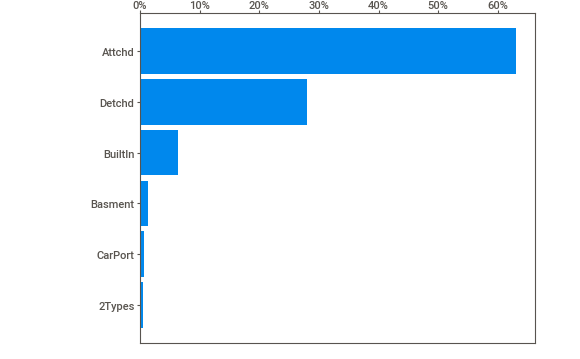
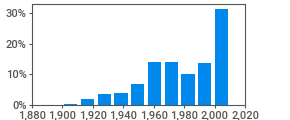
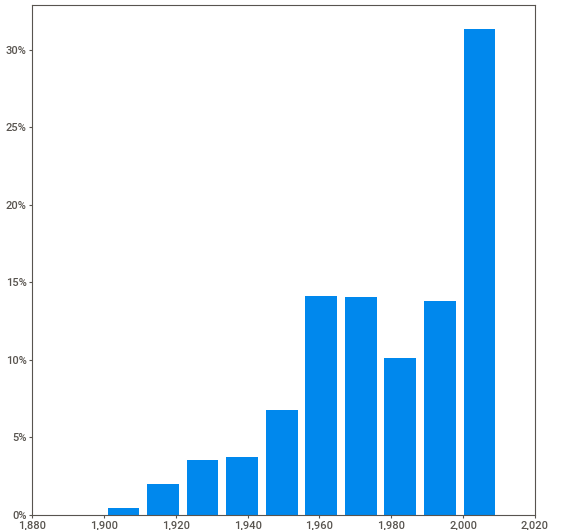
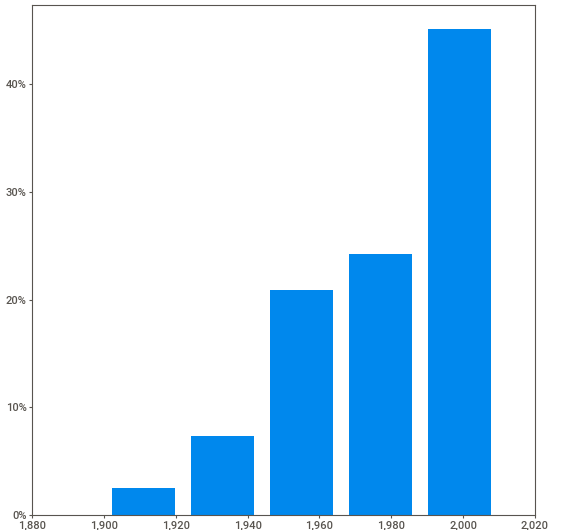
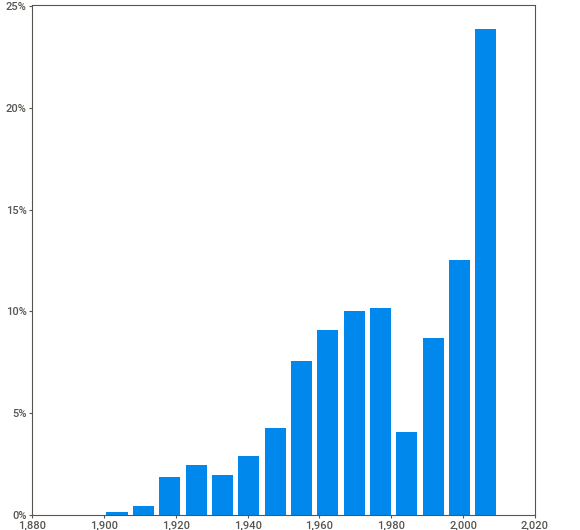
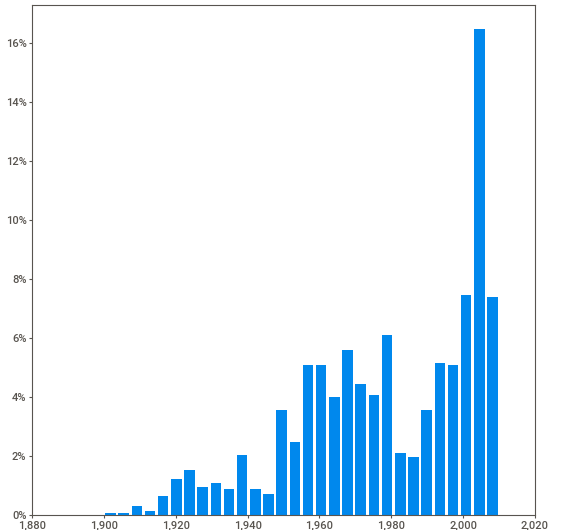
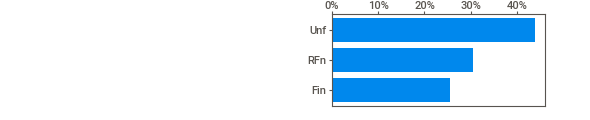
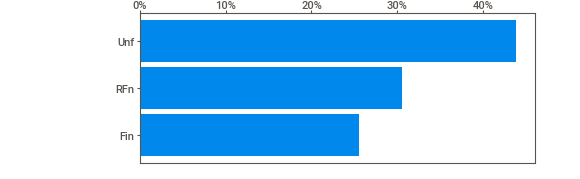
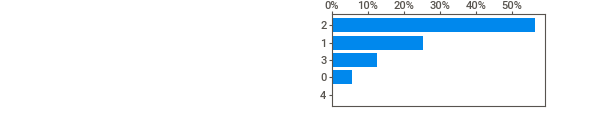
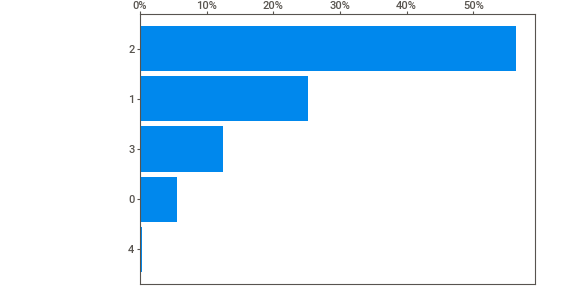
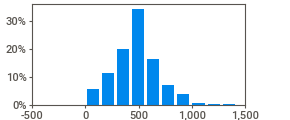
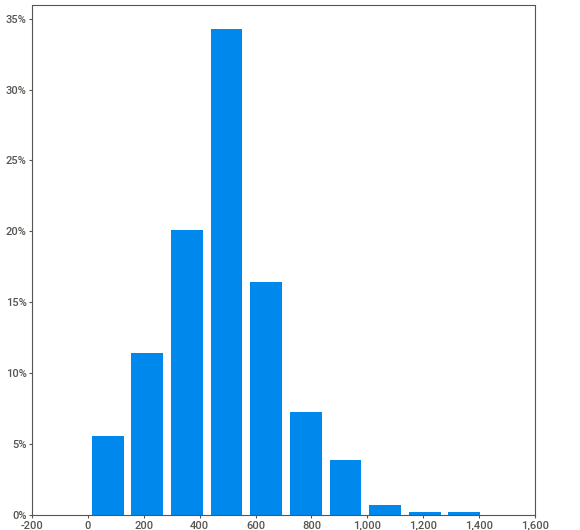
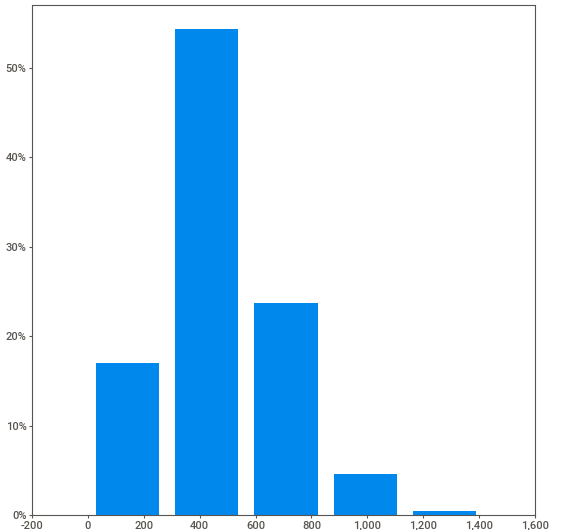
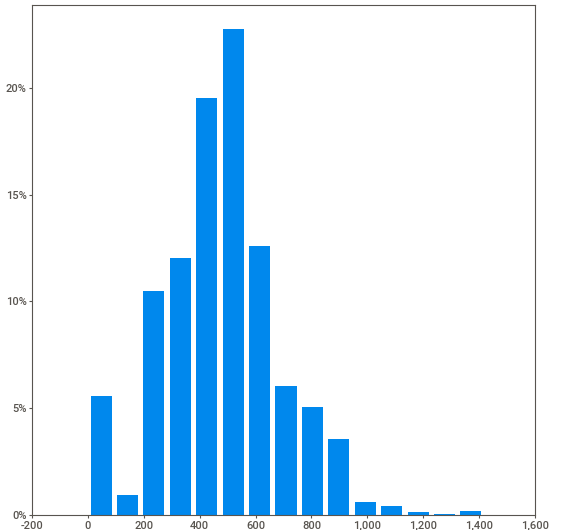
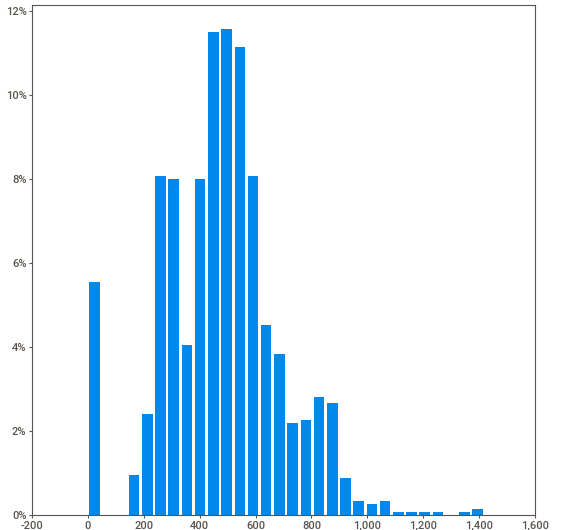
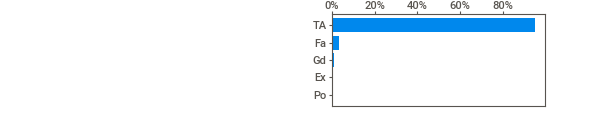
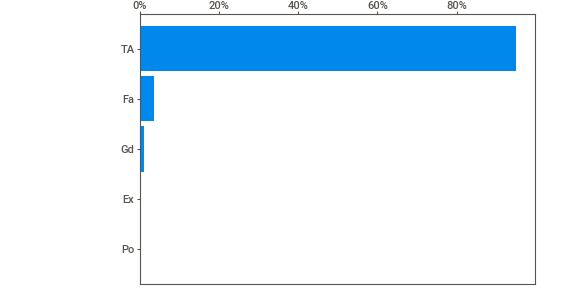
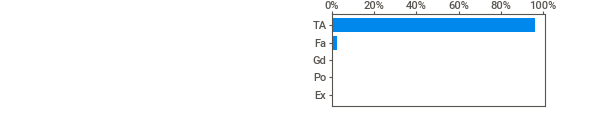
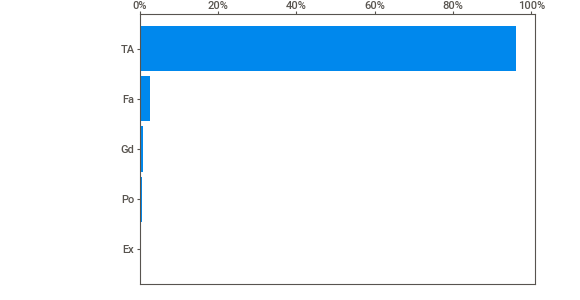
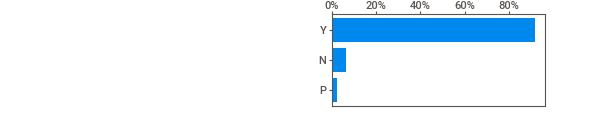
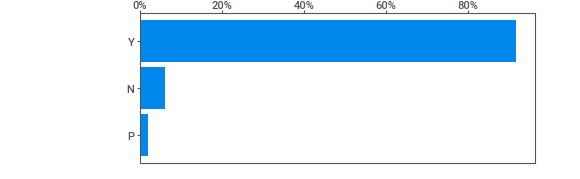
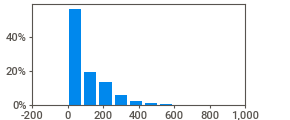
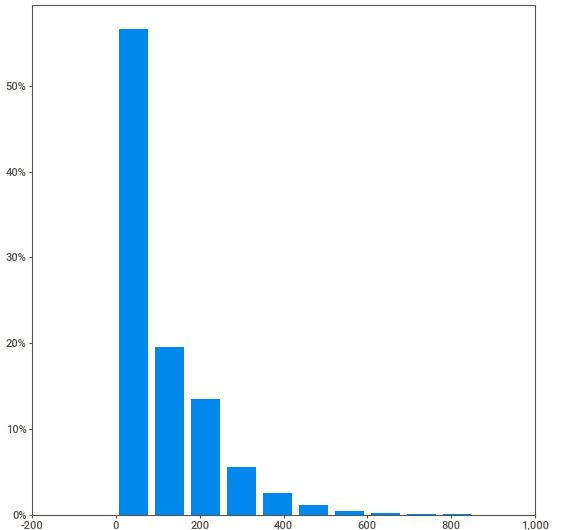
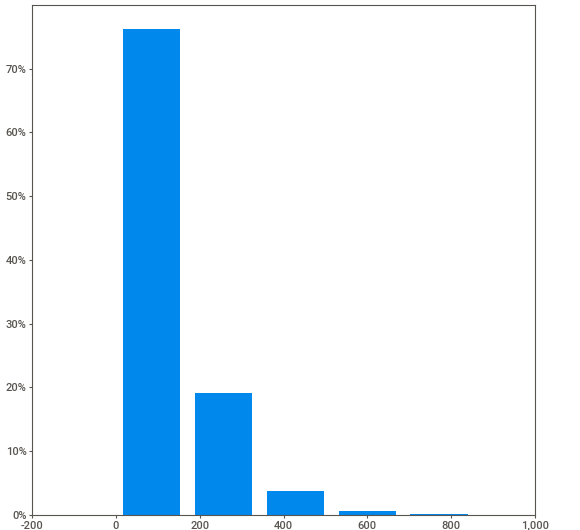
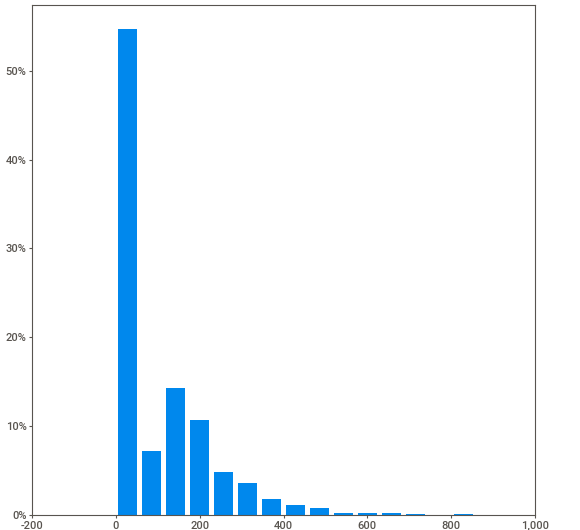
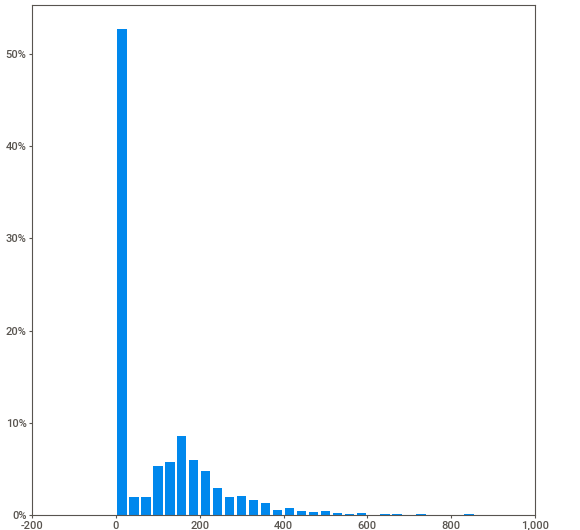
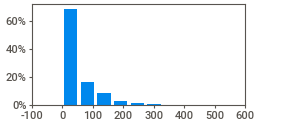
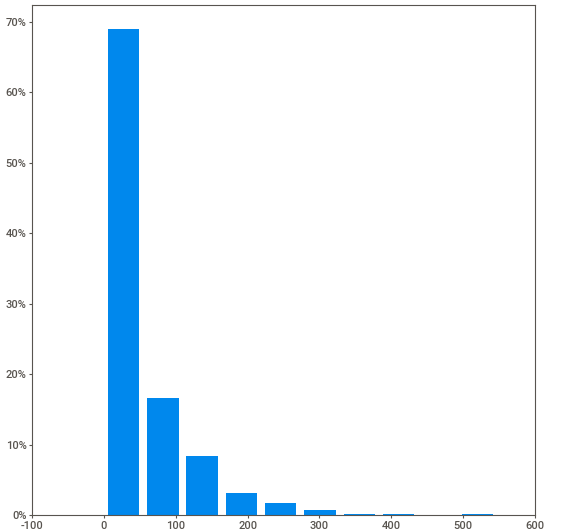
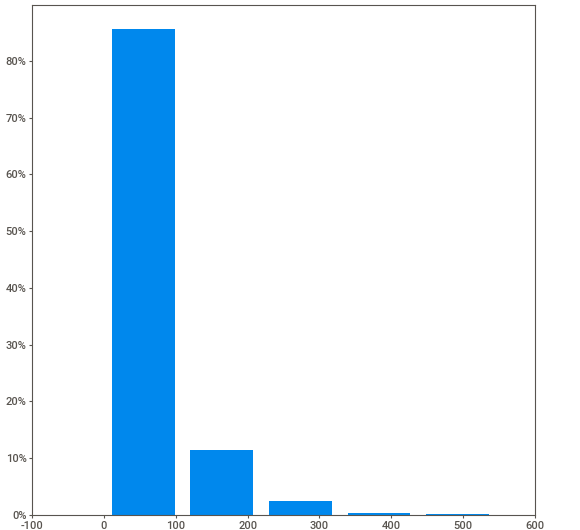
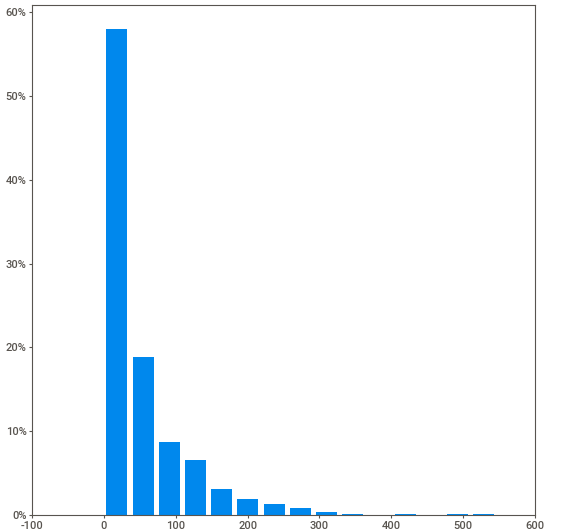
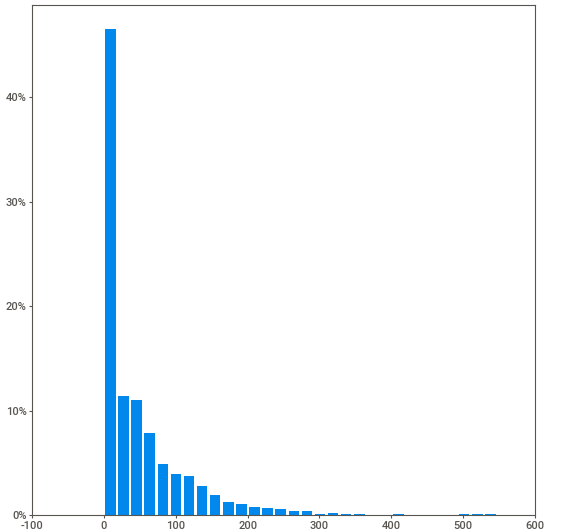
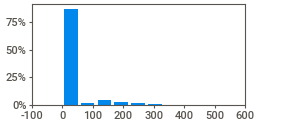
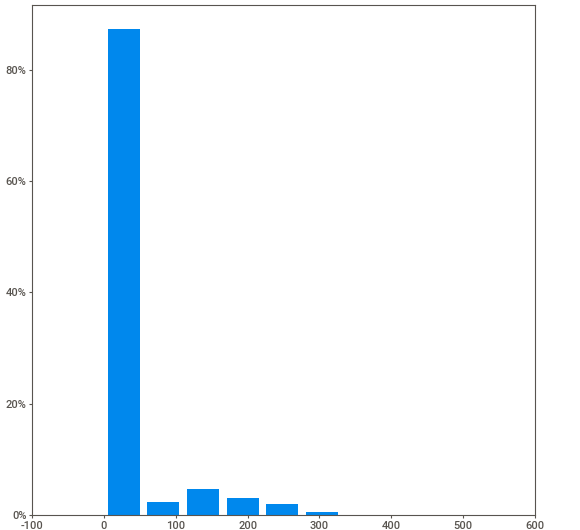
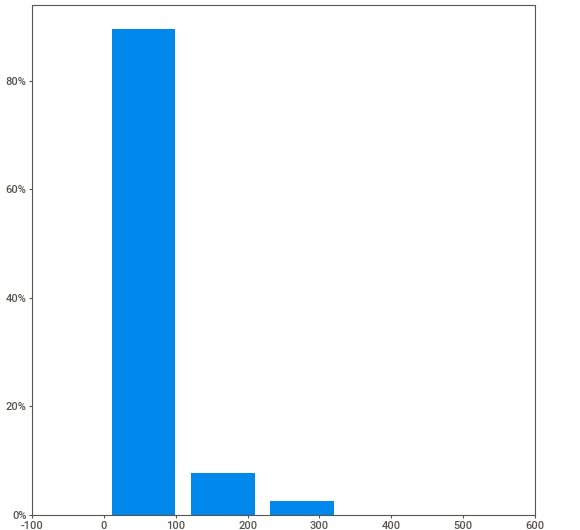
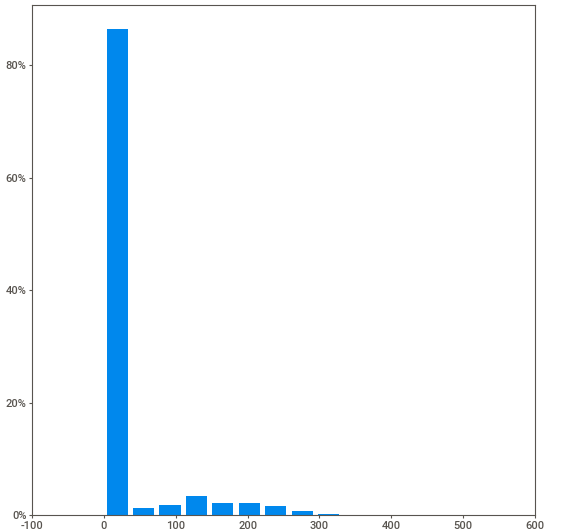
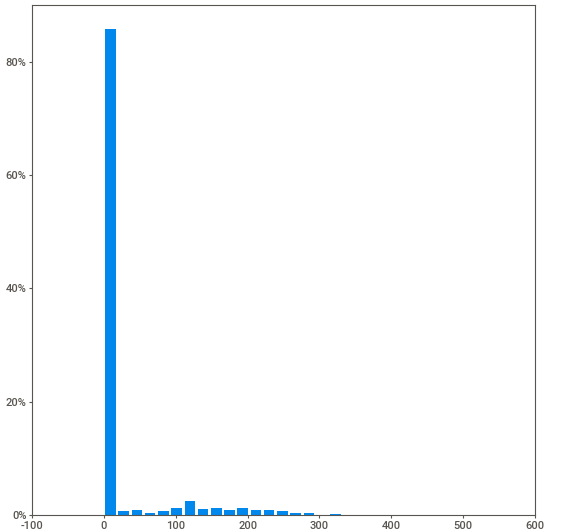
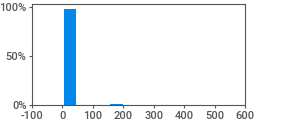
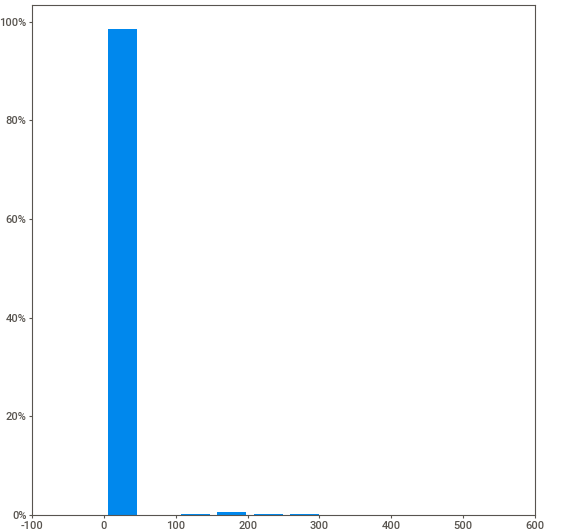
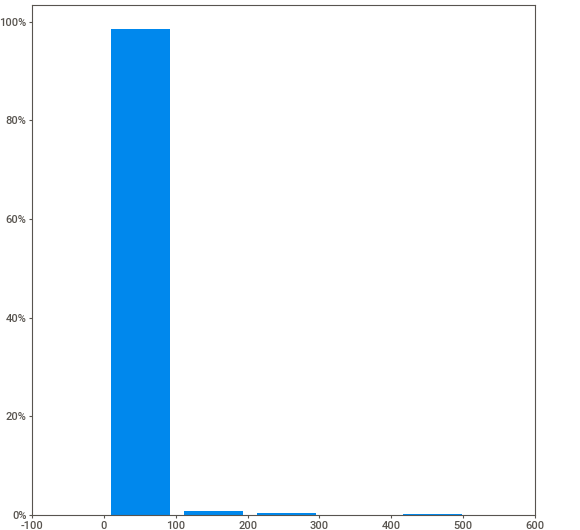
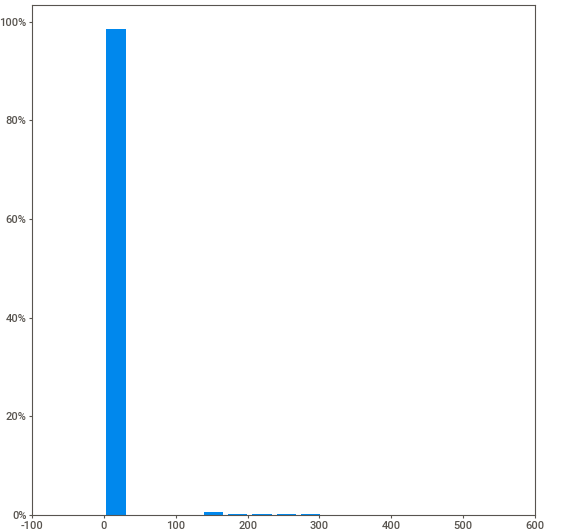
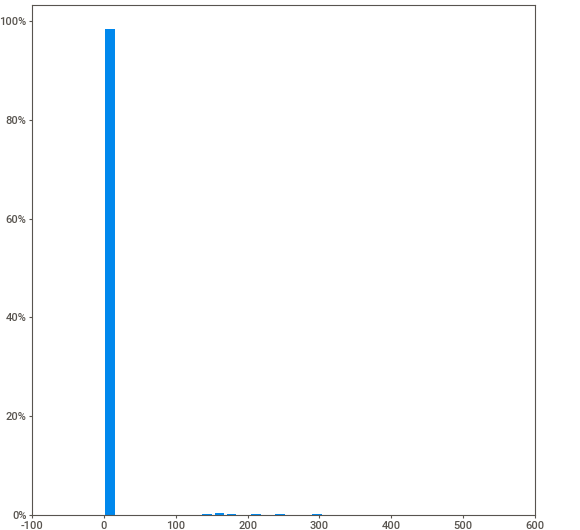
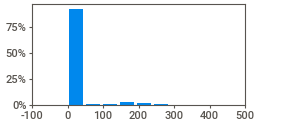
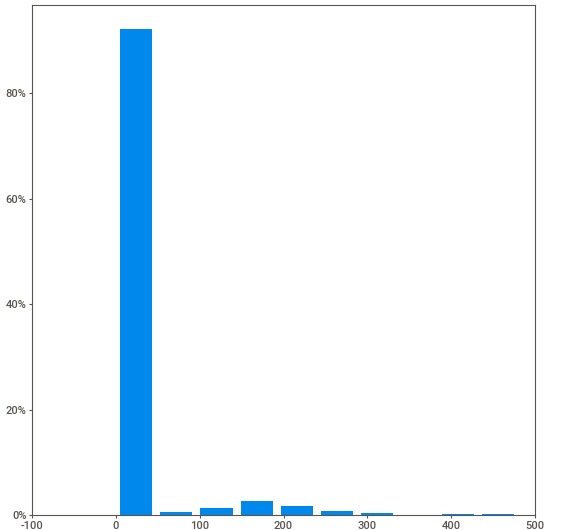
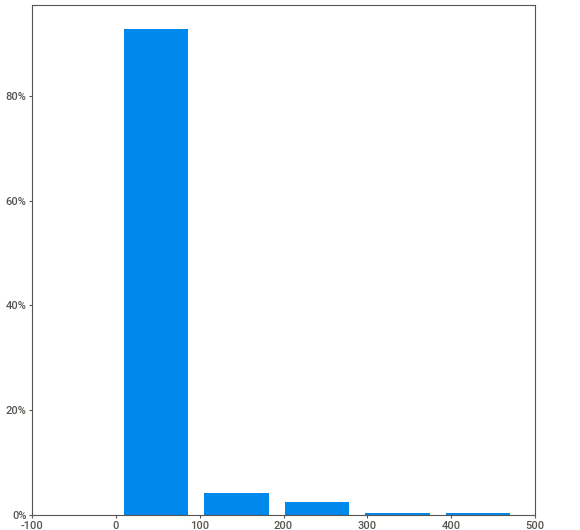
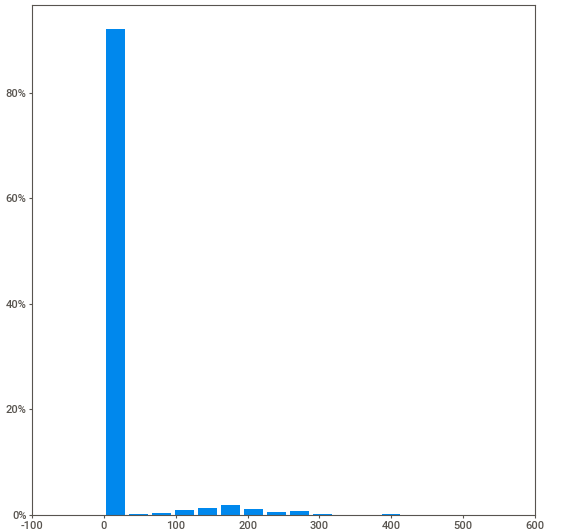
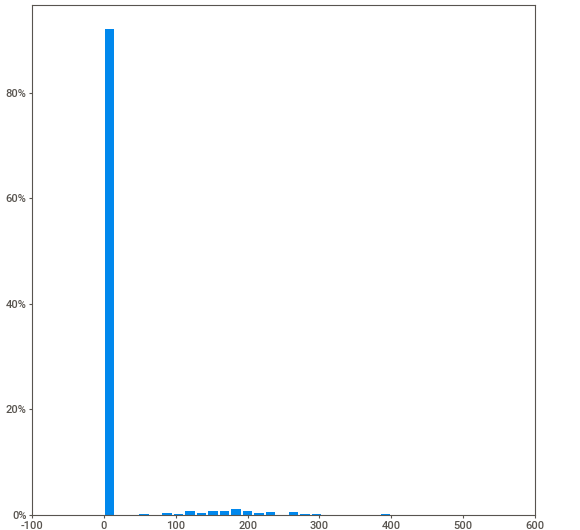
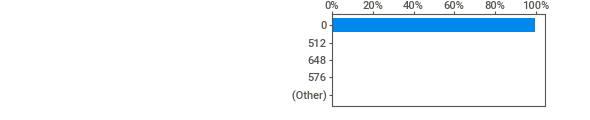
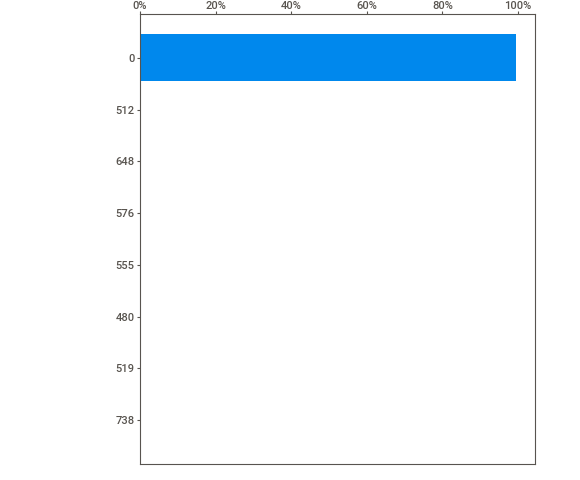
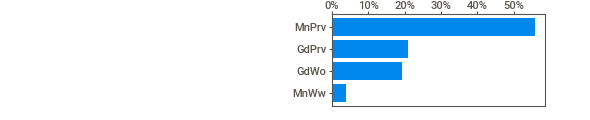
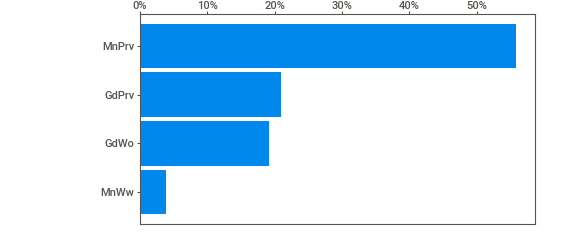
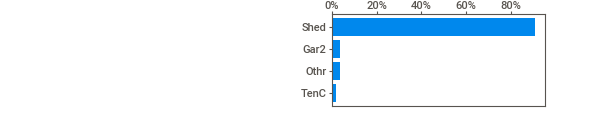
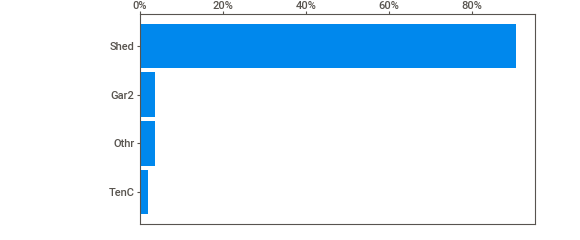
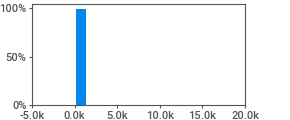
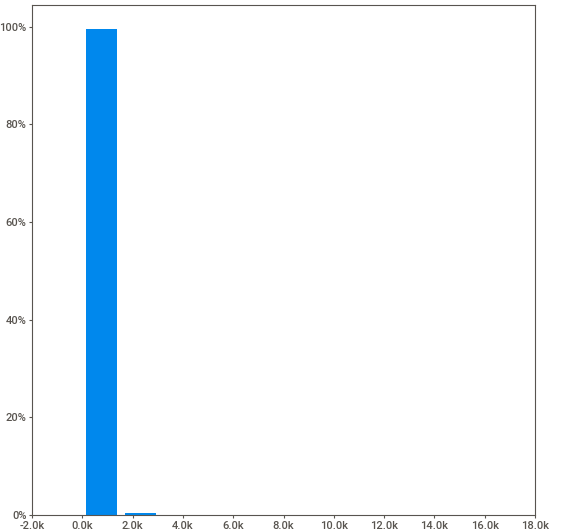
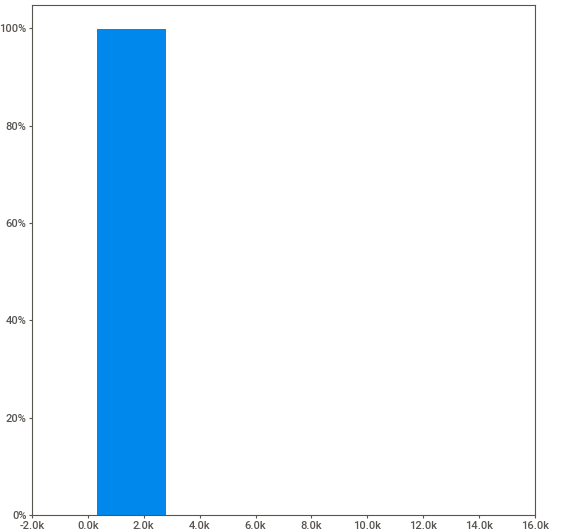
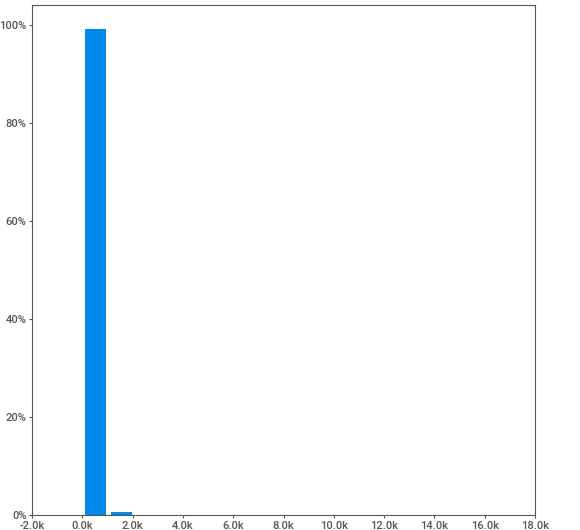
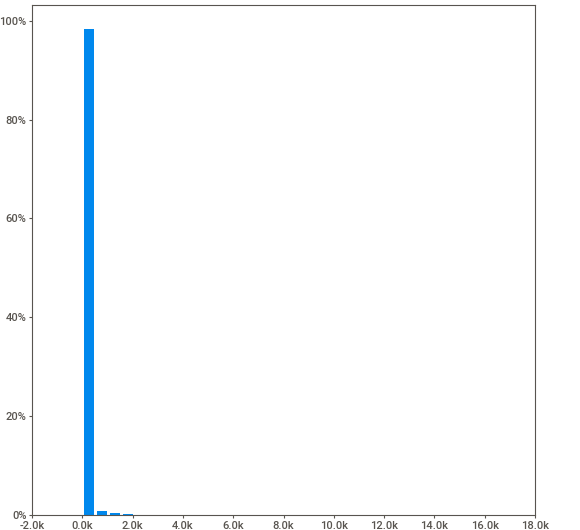
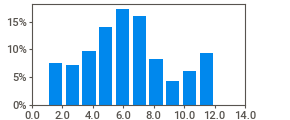
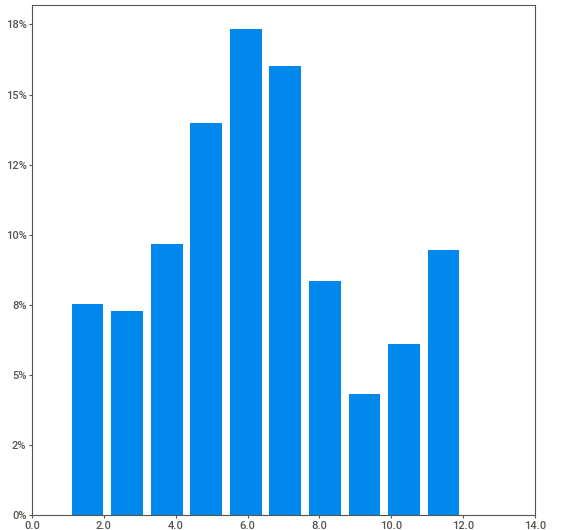
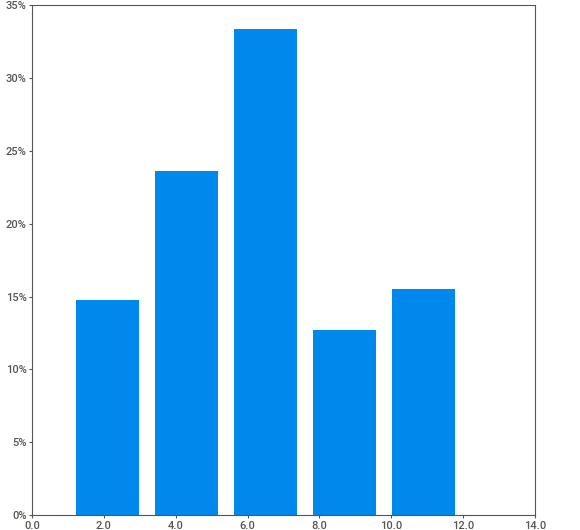
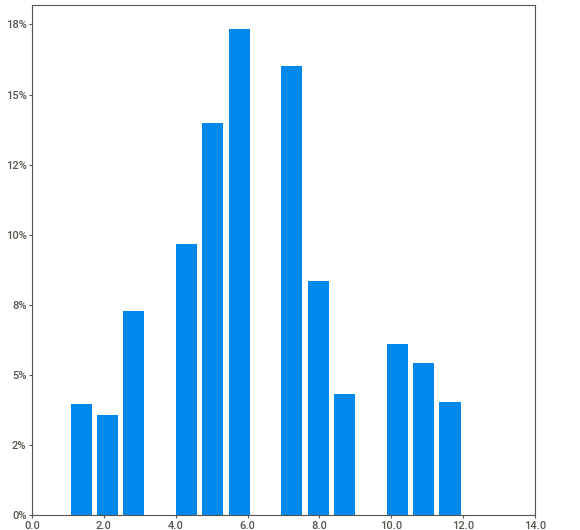
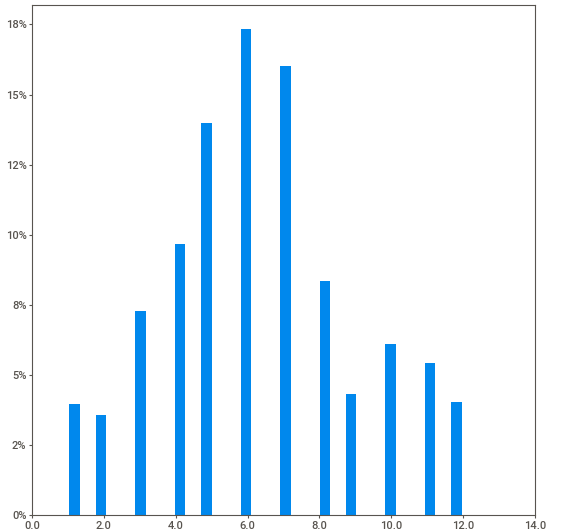
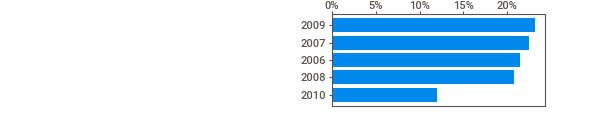
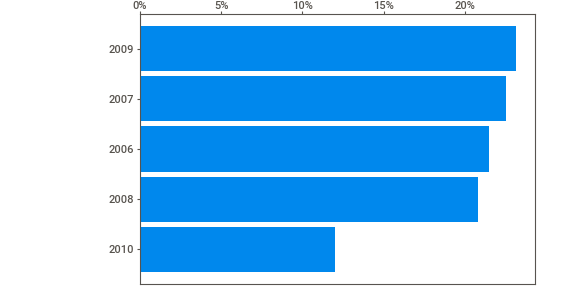
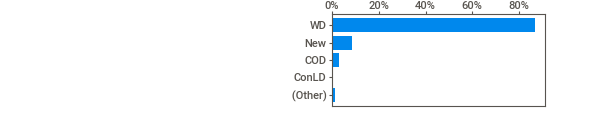
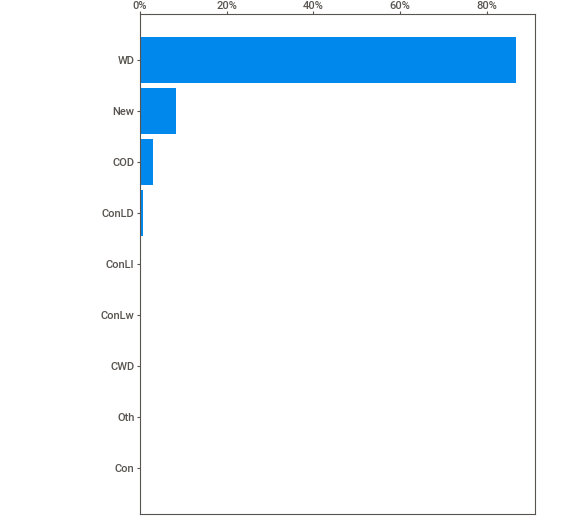
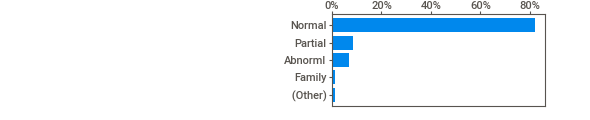
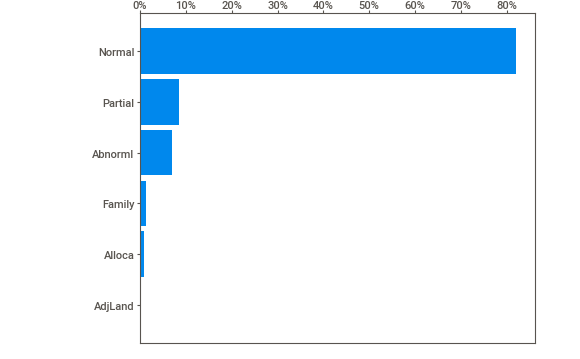
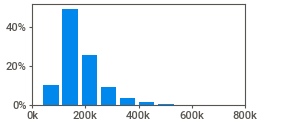
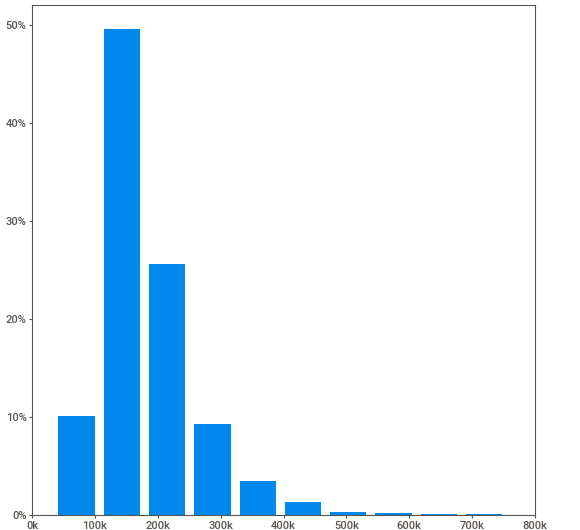
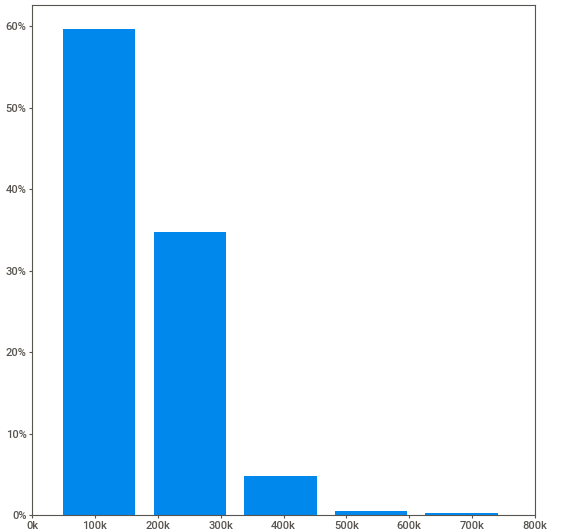
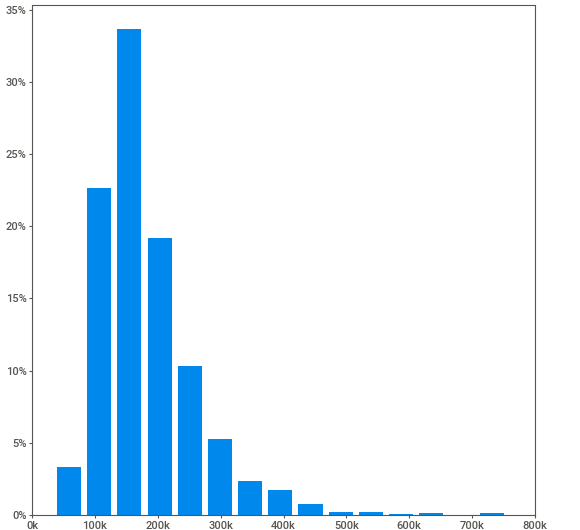
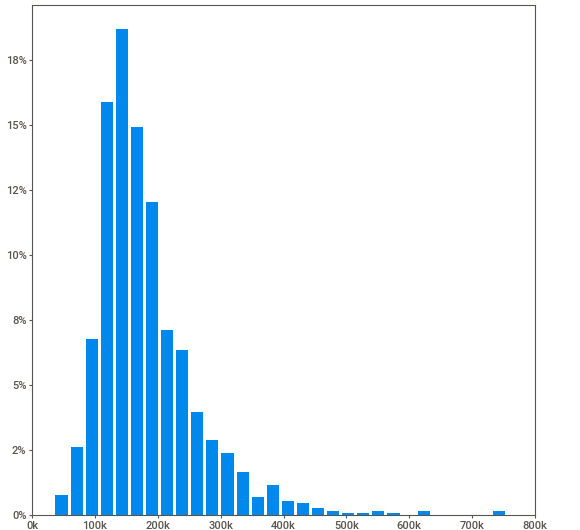
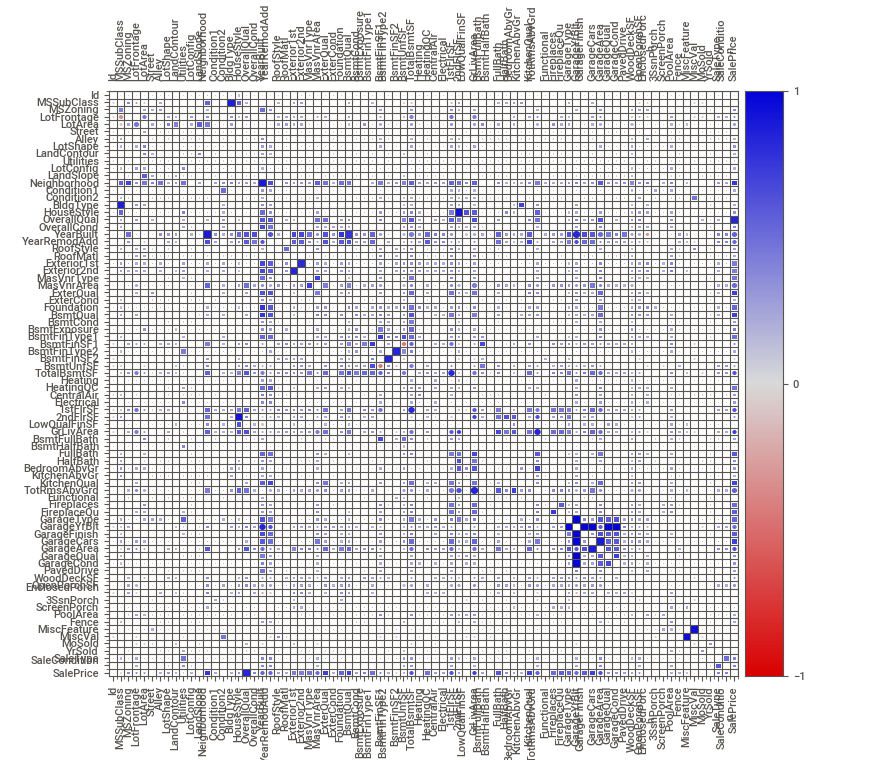
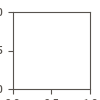

In [3]:
house_price_report = sw.analyze(train_data)
house_price_report.show_notebook(layout='vertical')

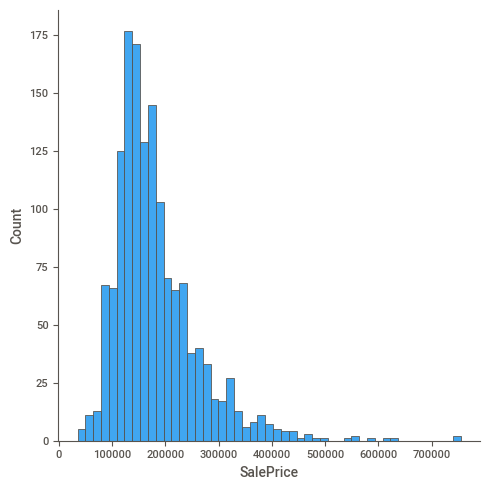

In [4]:
sns.displot(train_data['SalePrice'])

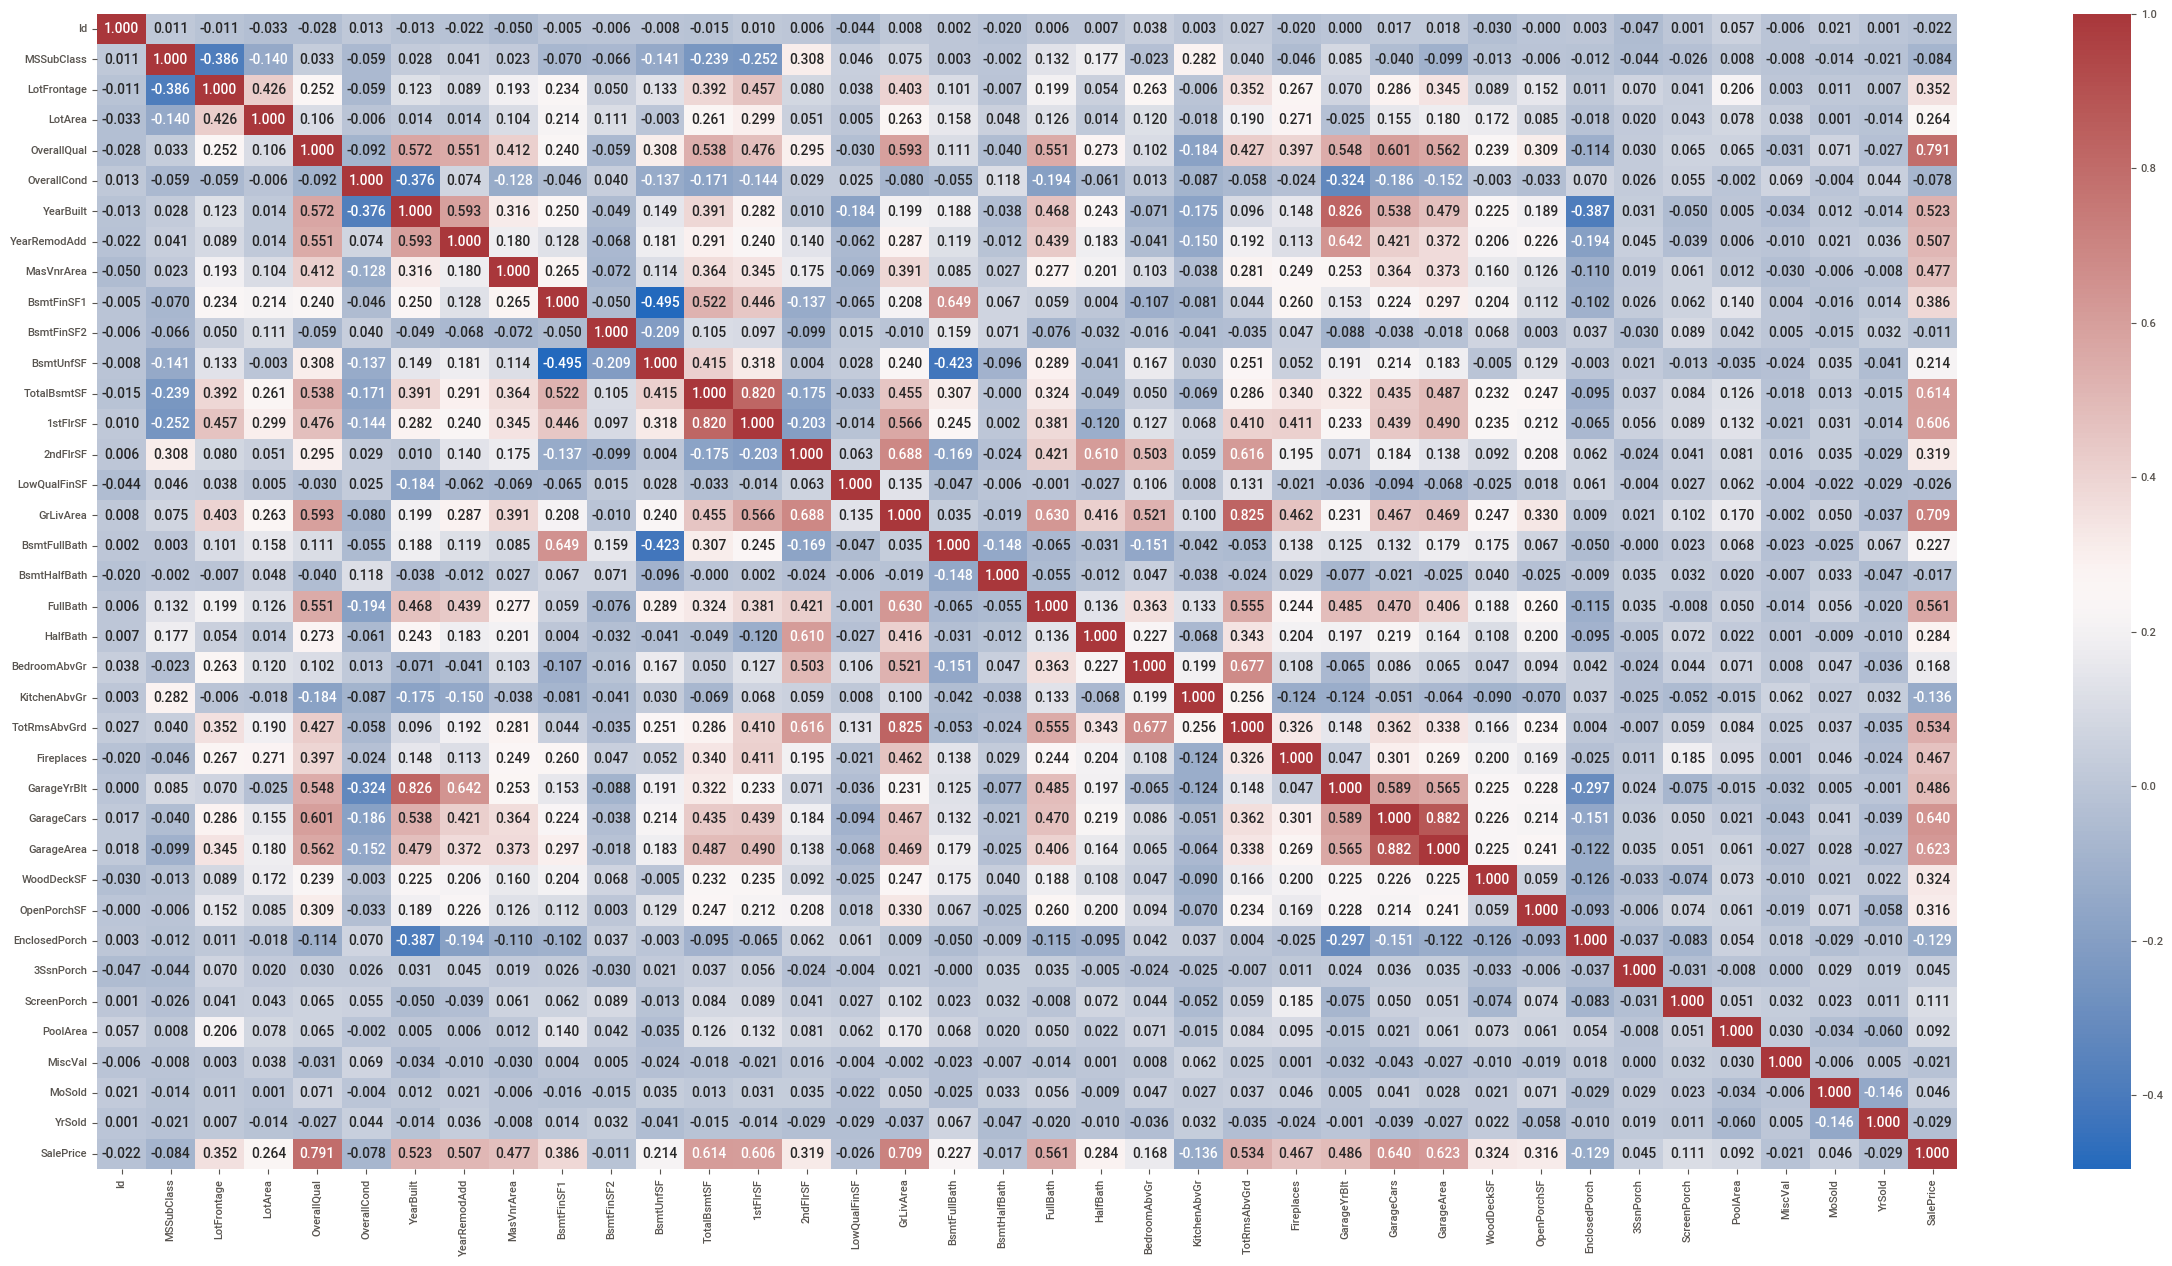

In [5]:
plt.rcParams['figure.figsize']=30,15
g = sns.heatmap(train_data.corr(),annot=True, fmt = ".3f",cmap='vlag')

## Dropping unnecessary columns

#### ---Train---

In [6]:
train_data.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
# drop columns have % of missing value high and "Id" column
train_data=train_data.drop(["Id","Alley","PoolQC","Fence","MiscFeature"],axis=1)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [9]:
#Covert missing train's num data
train_data["LotFrontage"] = train_data["LotFrontage"].fillna(train_data["LotFrontage"].mean())
train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(train_data["MasVnrArea"].mean())
train_data["GarageYrBlt"] = train_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].mean())

In [10]:
#Covert missing train's cat data
c = ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2", 
    "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical", "FireplaceQu", "BsmtFinType1")
for col in c:
  if train_data[col].dtype == "object":
    train_data[col] = train_data[col].fillna("None")

#### ---Test---

In [11]:
test_data.isnull().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

In [12]:
test_data=test_data.drop(["Alley","PoolQC","Fence","MiscFeature"],axis=1)

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [14]:
#Convert missing test's num data
test_data["LotFrontage"] = test_data["LotFrontage"].fillna(test_data["LotFrontage"].mean())
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(test_data["MasVnrArea"].mean())
test_data["GarageYrBlt"] = test_data["GarageYrBlt"].fillna(train_data["GarageYrBlt"].mean())
test_data["GarageCars"] = test_data["GarageCars"].fillna(0)
test_data["GarageArea"] = test_data["GarageArea"].fillna(test_data["GarageArea"].mean())
test_data["BsmtFullBath"] = test_data["BsmtFullBath"].fillna(0)
test_data["BsmtHalfBath"] = test_data["BsmtHalfBath"].fillna(0)
test_data["BsmtFinSF1"] = test_data["BsmtFinSF1"].fillna(test_data["BsmtFinSF1"].mean())
test_data["BsmtFinSF2"] = test_data["BsmtFinSF2"].fillna(test_data["BsmtFinSF2"].mean())
test_data["TotalBsmtSF"] = test_data["TotalBsmtSF"].fillna(test_data["TotalBsmtSF"].mean())
test_data["BsmtUnfSF"] = test_data["BsmtUnfSF"].fillna(test_data["BsmtUnfSF"].mean())

In [15]:
#Convert missing test's cat data
c = ("GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtFinType2",
   "BsmtCond", "BsmtQual", "BsmtExposure", "MasVnrType", "Electrical","MSZoning",
   "Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional",
   "FireplaceQu","SaleType", "BsmtFinType1")
for col in c:
  if test_data[col].dtype == "object":
    test_data[col] = test_data[col].fillna("None")

In [16]:
train_data.isnull().sum().sum()

0

In [17]:
test_data.isnull().sum().sum()

0

## Encoding categorical data with LabelEncoder()

#### ---Train---

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
from sklearn.preprocessing import LabelEncoder
catagory_cols = ('MSZoning','Street','LotShape','LandContour',
                'Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                'Condition2','BldgType', 'HouseStyle', 'RoofStyle','RoofMatl',
                'Exterior1st','Exterior2nd','ExterCond','Foundation','Heating',
                'HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu',
                'PavedDrive','SaleType','SaleCondition', "GarageType", "GarageFinish",
                "GarageQual", "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual",
                "BsmtExposure", "MasVnrType", "Electrical", "BsmtFinType1", "ExterQual")
for c in catagory_cols:
  le = LabelEncoder()
  train_data[c]= le.fit_transform(train_data[c].values)

#### ---Test---

In [20]:
from sklearn.preprocessing import LabelEncoder
catagory_cols = ('MSZoning','Street','LotShape','LandContour',
                'Utilities','LotConfig','LandSlope','Neighborhood',
                'Condition1','Condition2','BldgType', 'HouseStyle', 
                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                'ExterCond','Foundation','Heating','HeatingQC','CentralAir',
                'KitchenQual','Functional','FireplaceQu','PavedDrive','SaleType',
                'SaleCondition', "GarageType", "GarageFinish", "GarageQual",
                "GarageCond", "BsmtFinType2", "BsmtCond", "BsmtQual", "BsmtExposure",
                "MasVnrType", "Electrical", "BsmtFinType1", "ExterQual")
for c in catagory_cols:
  le = LabelEncoder()
  test_data[c]= le.fit_transform(test_data[c].values)

In [21]:
train_data.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 76 columns]

In [22]:
test_data.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0  1461          20         3         80.0    11622       1         3   
1  1462          20         4         81.0    14267       1         0   
2  1463          60         4         74.0    13830       1         0   
3  1464          60         4         78.0     9978       1         0   
4  1465         120         4         43.0     5005       1         0   

   LandContour  Utilities  LotConfig  ...  OpenPorchSF  EnclosedPorch  \
0            3          0          4  ...            0              0   
1            3          0          0  ...           36              0   
2            3          0          4  ...           34              0   
3            3          0          4  ...           36              0   
4            1          0          4  ...           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0          0          120         0        0       6    2010         9   
1          0            0         0    12500       6    2010         9   
2          0            0         0        0       3    2010         9   
3          0            0         0        0       6    2010         9   
4          0          144         0        0       1    2010         9   

   SaleCondition  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 76 columns]

## Spliting the Train & Test datasets

In [23]:
X_train = train_data.drop("SalePrice", axis=1)
Y_train = train_data["SalePrice"]
X_test  = test_data.drop("Id", axis=1).copy()

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_pca = sc.fit_transform(X_train)
X_test_pca = sc.transform(X_test)

## Using PCA to dimensionality raduction

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

# <font color='blue'>Part 2 - Training model</font>

In [26]:
# Using Random Forest with no Grid Search 
from sklearn.ensemble import RandomForestRegressor
regressor_no_pca = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor_no_pca.fit(X_train, Y_train)
Y_pred_no_pca = regressor_no_pca.predict(X_test)

In [27]:
regressor_no_pca.score(X_train, Y_train)
regressor = round(regressor_no_pca.score(X_train, Y_train) * 100, 2)
regressor

98.19

In [28]:
# Using Random Forest with no Grid Search 
regressor_pca = RandomForestRegressor(n_estimators = 200, random_state = 0)
regressor_pca.fit(X_train_pca, Y_train)
Y_pred_pca = regressor_pca.predict(X_test_pca)

In [29]:
regressor_pca.score(X_train_pca, Y_train)
regressor_pca = round(regressor_pca.score(X_train_pca, Y_train) * 100, 2)
regressor_pca

97.9

In [30]:
# Using Random Forest with Grid Search
param_grid = {
    'max_depth': [1, 2, 5, 10, 20 ],
    'min_samples_leaf': [10, 20, 50, 100 , 200 , 400],
    'max_features': [4 , 8 , 15 , 20],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [31]:
from sklearn.model_selection import GridSearchCV
param_test = GridSearchCV(estimator=regressor_pca, param_grid=param_grid, cv= 4)

In [32]:
param_test.fit(X_train_pca,Y_train)

TypeError: estimator should be an estimator implementing 'fit' method, 97.9 was passed

In [ ]:
rf_best = param_test.best_estimator_

In [ ]:
rf_best

In [ ]:
rf_best = rf_best.fit(X_train_pca,Y_train)

In [ ]:
y_train_pred_tune = rf_best.predict(X_train_pca)

# <font color='blue'>Part 3 - Creating a submission.csv</font>

In [36]:
result = pd.DataFrame({
        "Id": test_data["Id"],
        "SalePrice ": Y_pred_no_pca,
        "SalePrice PCA": Y_pred_pca
    })
result.head()

Id  SalePrice   SalePrice PCA
0  1461  123555.615     117686.790
1  1462  156877.685     157038.355
2  1463  172652.165     175893.410
3  1464  175662.070     196621.650
4  1465  196935.190     187601.085

In [37]:
result.to_csv('submission.csv',index=False)